# Maximum independent set (graph theory)

Problem największego zbioru niezależnego polega na znalezieniu w danym grafie zbioru niezależnego o maksymalnej liczbie wierzchołków i jest znanym problemem NP-trudnym.

Zbiór jest maksymalny gdy dodanie do niego jakiegokolwiek elementu sprawia, że przestaje być niezależny. Znalezienie takiego zbioru wierzchołków jest proste i może być wykonane za pomocą algorytmu zachłannego.

Każdy graf zawiera co najwyżej $3^{n/3}$ maksymalnych niezależnych zbiorów, ale wiele grafów ma znacznie mniej. To znaczy, że możemy znaleźć kilka tak samo dużych zbiorów złożonych z innych wierzchołków.

In [1]:
import time
import pygad
import random
import numpy as np
import pandas as pd
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
# pip install networkx[default]

## Sposób pierwszy:

In [2]:
# chromosom tworzą zera i jedynki, 1 - wierzchołek należy do zbioru, 0 - nie należy
# długość chromosomu odpowiada liczbie wierzchołków w grafie
# nie musimy znać ilości wierzchołków w niezależnym zbiorze maksymalnym
# im więcej wierzchołków tym większa nagroda w funkcji fitness
graf = [[] for i in range(24)]

### 1. 24 wierzchołki, nieskierowany (po 3 krawędzie z każdego wierzchołka)

In [3]:
# pierwszy przykład został przedstawiony na grafice na stronie wikipedii (link w bibliografii)
# ponieważ znamy rozwiązanie, to będziemy mogli sprawdzić, czy algorytm dobrze rozwiązuje problem
# zacznijmy od dużych inputów (grafy po 24 wierzchołki)
# graf nieskierowany
# graf[i][j] połączenie między wierzchołkami i j
# 1 - jest połączenie z wierzchołkiem, 0 - nie ma połączenia z wierzchołkiem
graf1 = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #0
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #1
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #2
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], #3
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #4
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #5
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #6
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #7
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #8
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #9
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #10
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #11
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], #12
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #13
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], #14
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], #15
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #16
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #17
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], #18
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], #19
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #20
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #21
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], #22
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]  #23
]
# rozwiazanie = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
graf = graf1

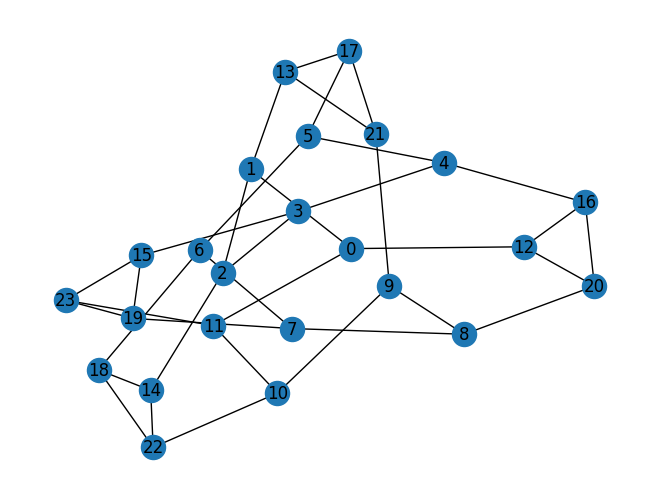

In [4]:
# rysowanie grafu
g = nx.Graph()

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, with_labels=True)
plt.show()
# networkx za każdym razem losowo ustawia nam wierzchołki
# dlatego czasem wykres może być mało czytelny, wtedy trzeba uruchomić tę komórkę jeszcze raz

In [5]:
# definiujemy parametry rozwiązania
# geny to oznaczenia, który wierzchołek jest w zbiorze
# 1 - należy do zbioru, 0 - nie należy do zbioru
gene_space = [0, 1]

def fitness_func(solution, solution_idx):
    fitness = 0
    # chromosom ma 24 geny
    # dodajemy do listy wierzchołki o indeksach, na których solution ma 1
    lista = []
    for k in range(len(solution)):
        if int(solution[k]) == 1:
            lista.append(k)
    # zmuszamy algorytm, by wybrał zbiór o największej liczbie wierzchołków
    fitness += 2*len(lista) # im więcej wierzchołków tym lepiej
    # sprawdzamy czy są połączenia między wierzchołkami w liście
    for i in lista:
        for j in lista:
            if i != j:
                if graf[i][j] == 1:
                    fitness -= 3
    return fitness

fitness_function = fitness_func

In [6]:
# ile chromosomów w populacji
sol_per_pop = 100
# ile genów ma chromosom
num_genes = 24

# ile wylaniamy rodziców do "rozmnażania" (okolo 50% populacji)
num_parents_mating = 50
# ile pokoleń
num_generations = 30
# ilu rodziców zachować (kilka procent)
keep_parents = 2

# jaki typ selekcji rodzicow?
parent_selection_type = "rank"

# w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genów?
mutation_type = "random"
mutation_percent_genes = 5

In [7]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_18' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.13733696937561035


In [8]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
Fitness value of the best solution = 18


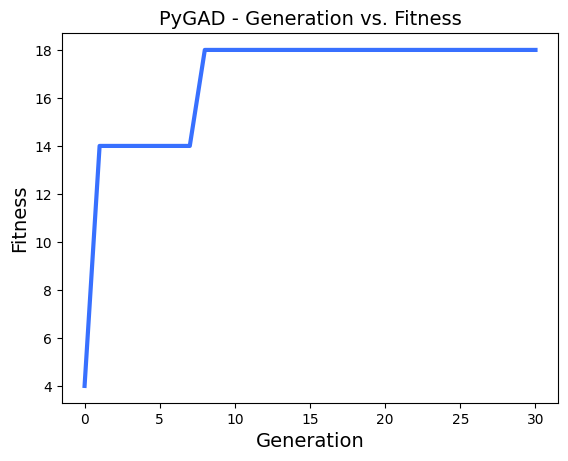

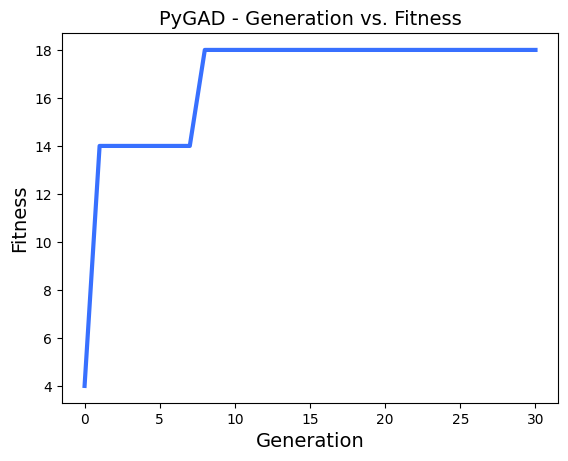

In [9]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

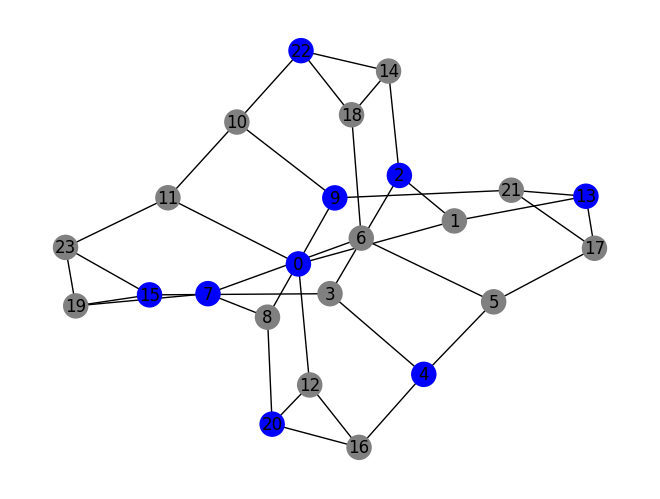

In [10]:
g = nx.Graph()

for i in range(24):
    g.add_node(i)

for i in range(len(graf1)):
    for j in range(len(graf1)):
        if graf1[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(24):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

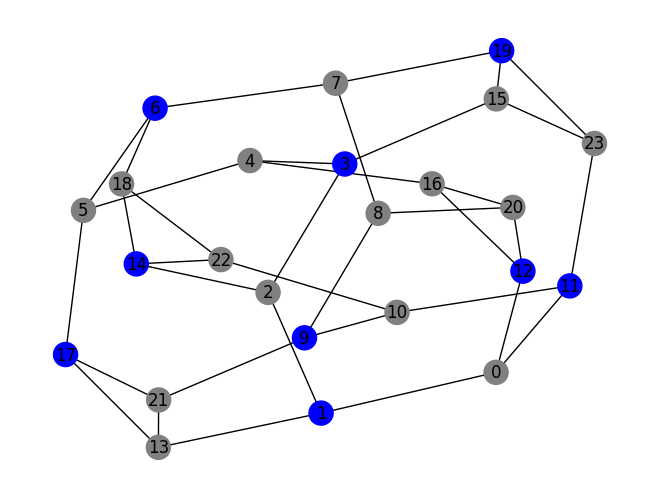

In [11]:
rozwiazanie1 = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
# to nie jest jedyne dobre rozwiązanie

g = nx.Graph()

for i in range(24):
    g.add_node(i)

for i in range(len(graf1)):
    for j in range(len(graf1)):
        if graf1[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(24):
    if rozwiazanie1[i] == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

In [12]:
# generowanie grafów o określonej liczbie wychodzących krawędzi:

#krawedzie = [[random.randint(0, 23) for _ in range(3)] for _ in range(24)]
#graf = [[0 for _ in range(24)] for _ in range(24)]
#for i in range(24):
#    for j in range(3):
#        if i != krawedzie[i][j]: # nie łączymy wierzchołka i z i, jeśli nie ma 3 wychodzących krawędzi to dopisujemy 1 w dowolnym miejscu
#            graf[i][krawedzie[i][j]] = 1
#graf

### 2. 24 wierzchołki, skierowany (po 3 krawędzie z każdego wierzchołka)

In [13]:
# pownieważ graf został wygenerowany losowo, to nie znamy rozwiązania
# dla tego konkretnego grafu algorytm zwraca najczęściej zbiór o mocy 10 (czasem fitness był równy 9),
# dlatego założymy, że jest to poprawna odpowiedź
graf2 = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #0
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #1
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], #2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], #3
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #4
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], #5
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], #7
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], #8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #10
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #11
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #12
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #13
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #14
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #15
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], #16
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #17
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #18
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #19
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #20
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], #21
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #22
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  #23
]
graf = graf2

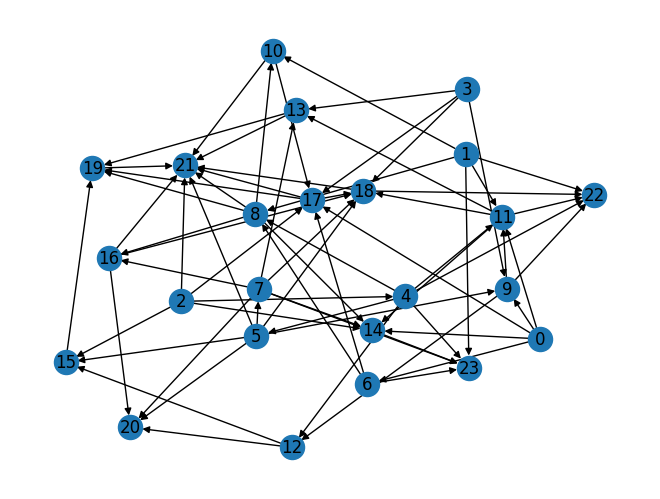

In [14]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [15]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_20' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.12963438034057617


In [16]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
Fitness value of the best solution = 18


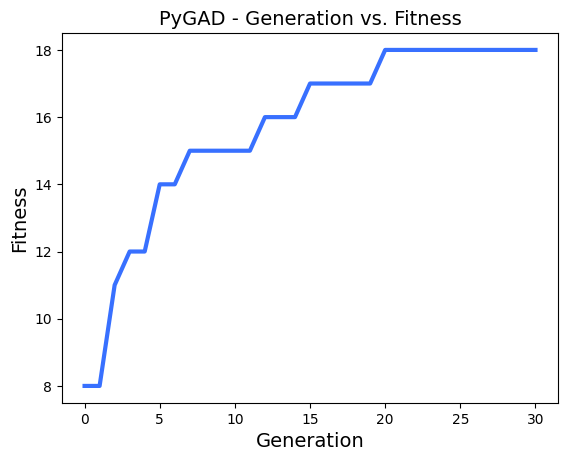

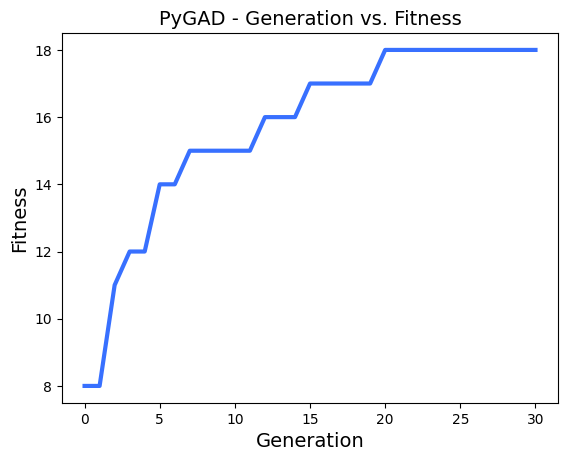

In [17]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

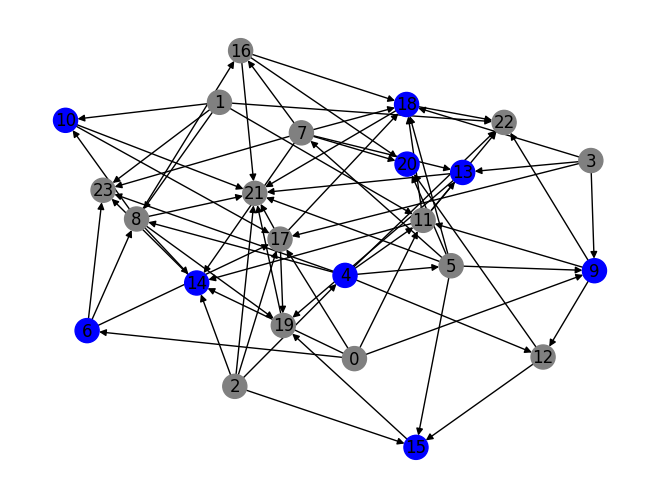

In [18]:
g = nx.Graph(directed=True)

for i in range(24):
    g.add_node(i)

for i in range(len(graf2)):
    for j in range(len(graf2)):
        if graf2[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

color_map = []
for i in range(24):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, arrows=True, **options, with_labels=True)
plt.show()

In [19]:
# generowanie grafów skierowanych o losowej liczbie krawędzi
# tym razem wierzchołek i może być połączony z i
#rnd_num = [[random.randint(0, 1) for _ in range(24)] for _ in range(24)]
#rnd_num

### 3. 24 wierzchołki, skierowany (losowa liczba połączeń)

In [20]:
# założenie: im więcej połączeń tym mniejszy zbiór wierzchołków niezależnych

In [21]:
graf3 = [
    [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], #0
    [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], #1
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], #2
    [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], #3
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], #4
    [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], #5
    [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], #6
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], #7
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], #8
    [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], #9
    [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], #10
    [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], #11
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], #12
    [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], #13
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], #14
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], #15
    [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], #16
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], #17
    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], #18
    [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], #19
    [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], #20
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], #21
    [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0], #22
    [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]  #23
]
graf = graf3

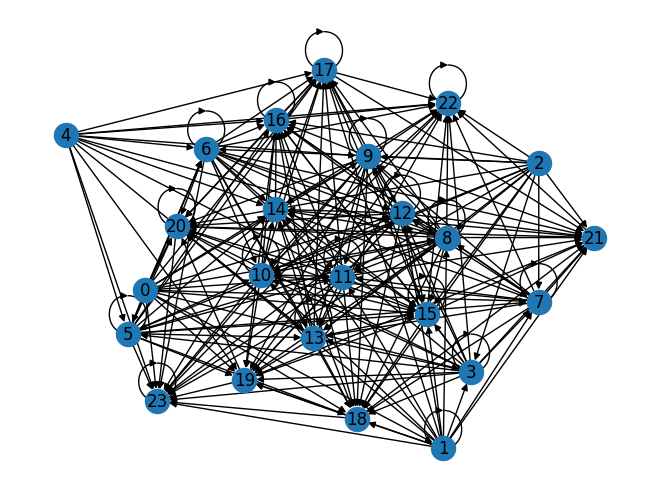

In [22]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()
# grafy o tylu połączeniach i wierzchołkach są prawie nieczytelne, trudno byłoby znaleźć szukany zbiór patrząc na wykres
# możliwe, że graf w 3D byłby bardziej czytelny

In [23]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_8' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.11931085586547852


In [24]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = 6


In [25]:
# wyniki z kilku uruchomień algorytmu
# [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
# [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
# [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
# [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
# [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
# [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
# moc największego znalezionego zbioru niezależnego to 4
# widzimy, że tylko jeden wierzchołek się zmienia (4 lub 13)

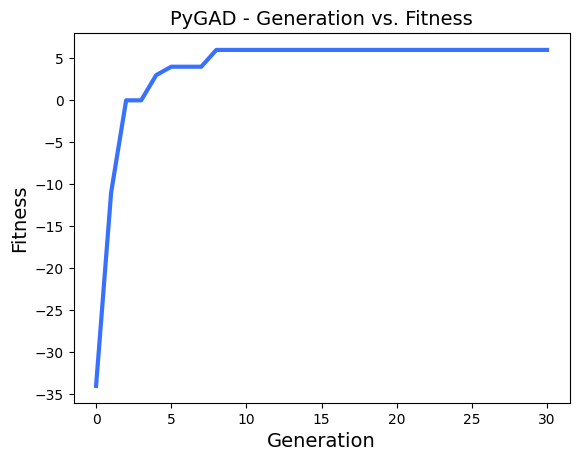

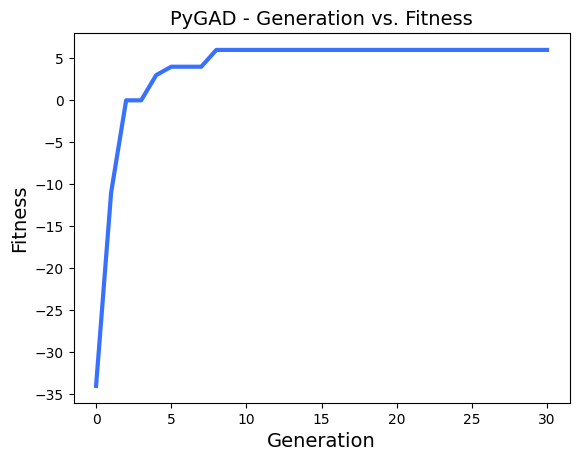

In [26]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

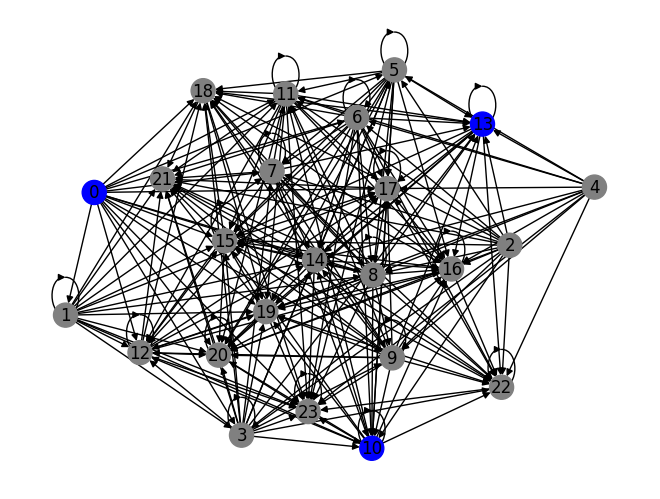

In [27]:
g = nx.Graph(directed=True)

for i in range(24):
    g.add_node(i)

for i in range(len(graf3)):
    for j in range(len(graf3)):
        if graf3[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

color_map = []
for i in range(24):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, arrows=True, **options, with_labels=True)
plt.show()

## Sprawdzenie efektywności

In [28]:
wyniki1 = 0
l1 = []
for i in range(100):
    graf1 = [
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #0
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #1
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #2
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], #3
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #4
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #5
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #6
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #7
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #8
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #9
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #10
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #11
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], #12
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #13
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], #14
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], #15
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #16
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #17
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], #18
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], #19
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #20
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #21
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], #22
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]  #23
    ]
    
    graf2 = [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #0
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #1
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], #2
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], #3
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #4
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], #5
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #6
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], #7
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], #8
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #9
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #10
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #11
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #12
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #13
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #14
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #15
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], #16
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #17
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #18
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #19
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #20
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], #21
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #22
        [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  #23
    ]
    
    graf3 = [
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], #0
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], #1
        [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], #2
        [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], #3
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], #4
        [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], #5
        [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], #6
        [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], #7
        [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], #8
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], #9
        [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], #10
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], #11
        [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], #12
        [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], #13
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], #14
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], #15
        [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], #16
        [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], #17
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], #18
        [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], #19
        [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], #20
        [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], #21
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0], #22
        [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]  #23
    ]
    
    grafy = [graf1, graf2, graf3]
    graf = random.choice(grafy)
    
    start = time.time()
    
    # inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        #stop_criteria='reach_18' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
    )

    # uruchomienie algorytmu
    ga_instance.run()

    end = time.time()
    czas = end - start
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if graf == graf1:
        if solution_fitness == 18:
            wyniki1 += 1
            l1.append(czas)
    if graf == graf2:
        if solution_fitness == 20:
            wyniki1 += 1
            l1.append(czas)
    if graf == graf3:
        if solution_fitness == 8:
            wyniki1 += 1
            l1.append(czas)

In [29]:
print('Efektywność: ', wyniki1/100)
print('Średni czas dla idealnego rozwiązania :', np.mean(l1))
# algorytm działa całkiem dobrze, ponad połowę zbiorów znajduje dobrze, czas rozwiązywania jest krótki

Efektywność:  0.62
Średni czas dla idealnego rozwiązania : 0.11607586568401705


In [30]:
# sprawdźmy, czy wyniki polepszą się dla średnich inputów, niech mają 18 wierzchołków

### 4. 18 wierzchołków, nieskierowany

In [31]:
# graf wymyślony samodzielnie
# największy znaleziony zbiór niezależny ma 8 elementów
# zobaczymy, czy program znajdzie większy
graf4 = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #0
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #1
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #2
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #3
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #4
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #5
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #6
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], #8
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], #9
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], #10
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], #11
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], #12
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], #13
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], #14
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], #15
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], #16
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]  #17
]
# rozwiazanie = [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
graf = graf4

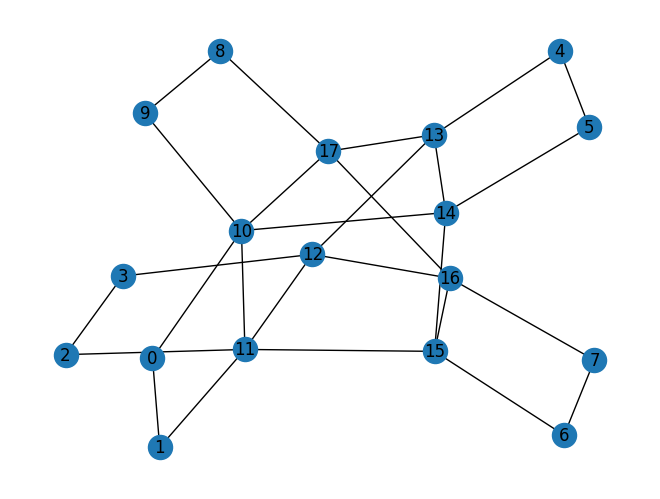

In [32]:
# rysowanie grafu
g = nx.Graph()

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, with_labels=True)
plt.show()

In [33]:
num_genes = 18
mutation_percent_genes = 6

In [34]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_16' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.12302350997924805


In [35]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
Fitness value of the best solution = 16


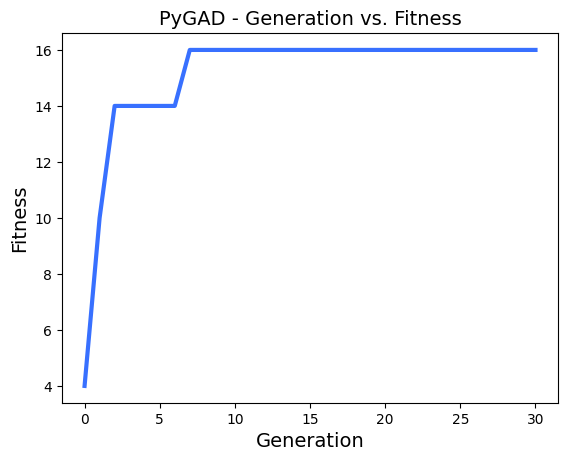

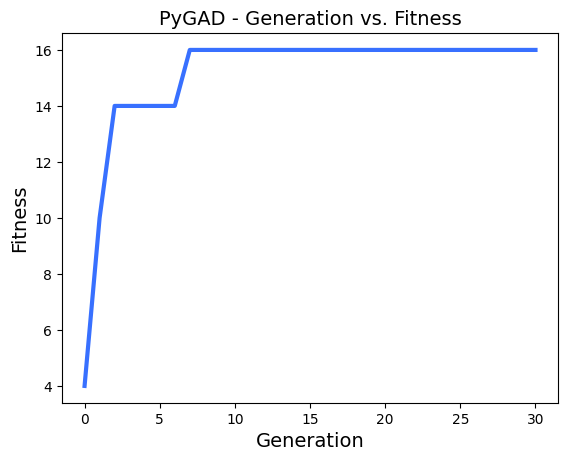

In [36]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

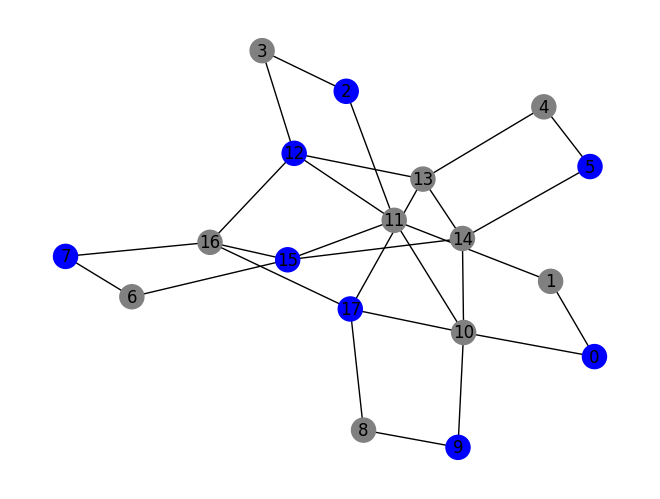

In [37]:
g = nx.Graph()

for i in range(18):
    g.add_node(i)

for i in range(len(graf4)):
    for j in range(len(graf4)):
        if graf4[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(18):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

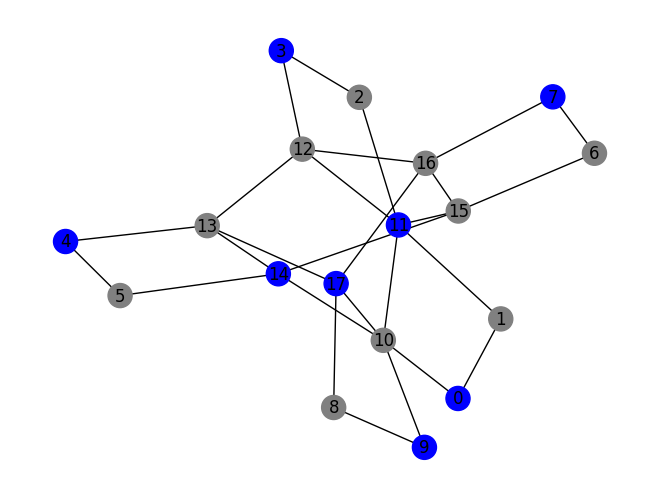

In [38]:
rozwiazanie4 = [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
# to nie jest jedyne dobre rozwiązanie

g = nx.Graph()

for i in range(18):
    g.add_node(i)

for i in range(len(graf4)):
    for j in range(len(graf4)):
        if graf4[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(18):
    if rozwiazanie4[i] == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

In [39]:
#krawedzie = [[random.randint(0, 17) for _ in range(4)] for _ in range(18)]
#graf = [[0 for _ in range(18)] for _ in range(18)]
#for i in range(18):
#    for j in range(4):
#        if i != krawedzie[i][j]: # nie łączymy wierzchołka i z i, jeśli nie ma 3 wychodzących krawędzi to dopisujemy 1 w dowolnym miejscu
#            graf[i][krawedzie[i][j]] = 1
#graf

### 5. 18 wierzchołków, skierowany (maksymalnie 4 krawędzie z każdego wierzchołka)

In [40]:
# graf wygenerowany z powyższego kodu
graf5 = [
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
]
graf = graf5

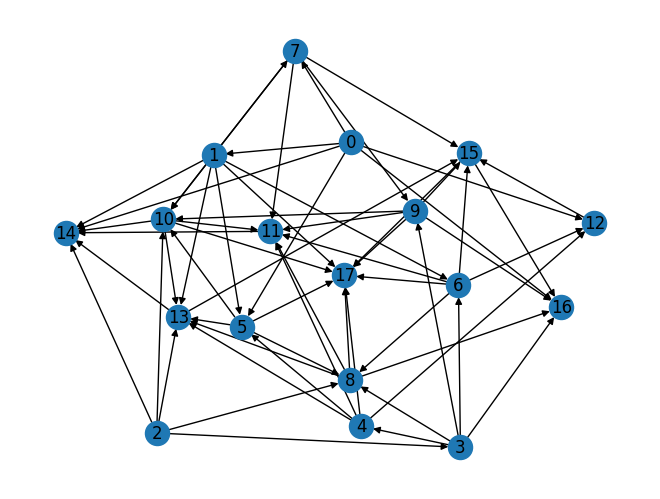

In [41]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [42]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_20' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.11365032196044922


In [43]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
Fitness value of the best solution = 10


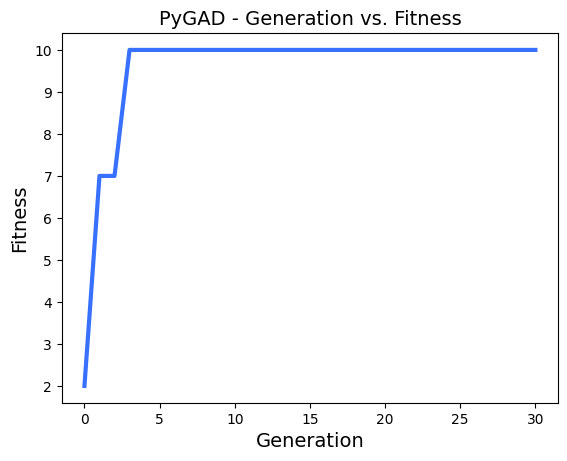

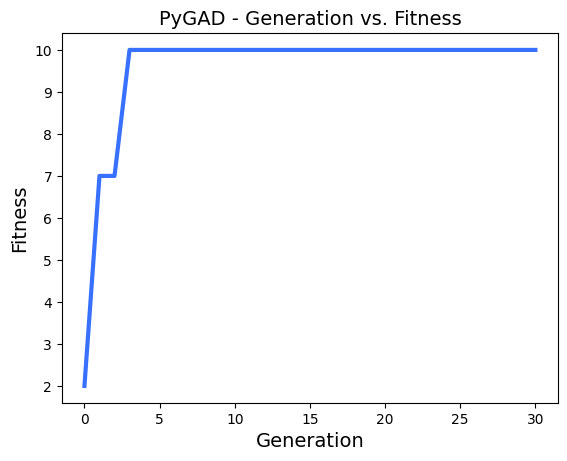

In [44]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

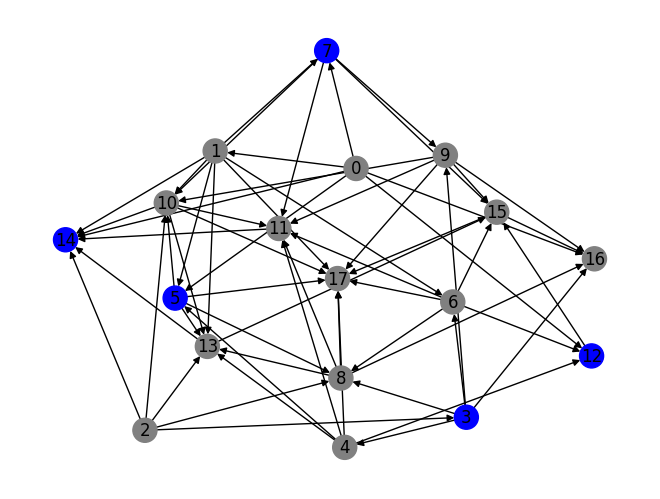

In [45]:
g = nx.Graph()

for i in range(18):
    g.add_node(i)

for i in range(len(graf5)):
    for j in range(len(graf5)):
        if graf5[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
} 

color_map = []
for i in range(18):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

In [46]:
#rnd_num = [[random.randint(0, 1) for _ in range(18)] for _ in range(18)]
#rnd_num

### 6. 18 wierzchołków, skierowany (losowa liczba połączeń)

In [47]:
graf6 = [
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
]
graf = graf6

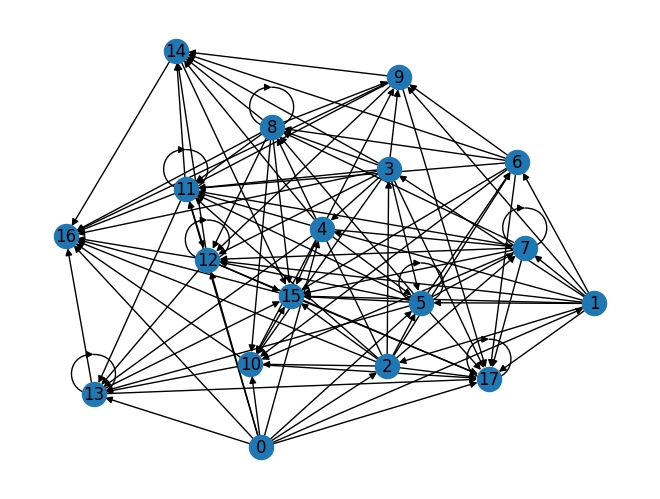

In [48]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [49]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_8' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.1087808609008789


In [50]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fitness value of the best solution = 8


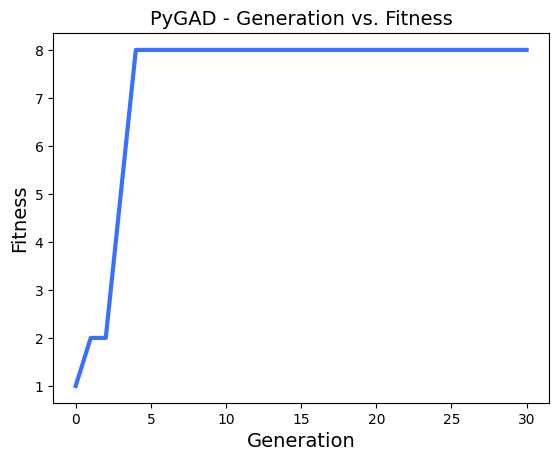

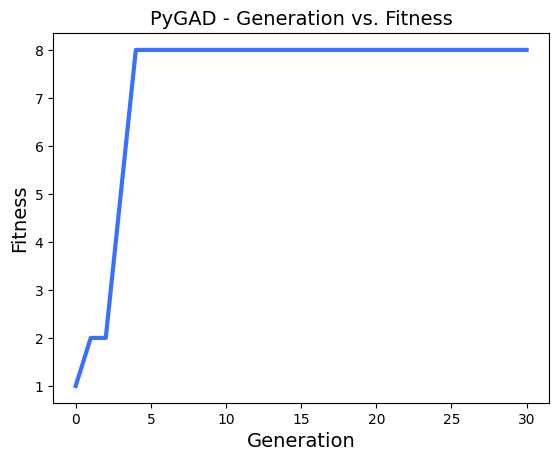

In [51]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

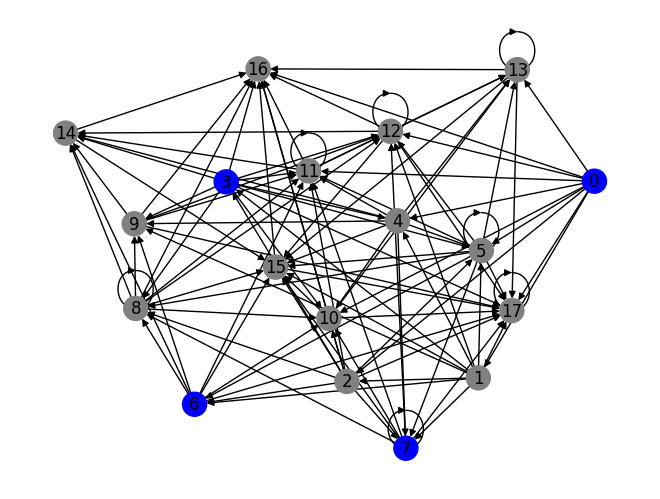

In [52]:
g = nx.Graph()

for i in range(18):
    g.add_node(i)

for i in range(len(graf6)):
    for j in range(len(graf6)):
        if graf6[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
} 

color_map = []
for i in range(18):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

## Sprawdzenie efektywności

In [53]:
wyniki2 = 0
l2 = []
for i in range(100):
    graf4 = [
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #0
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #1
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #2
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #3
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #4
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #5
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #6
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #7
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], #8
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], #9
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], #10
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], #11
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], #12
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], #13
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], #14
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], #15
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], #16
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]  #17
    ]
    
    graf5 = [
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
    
    graf6 = [
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
        [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
        [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
        [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
        [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
    ]
    
    grafy = [graf4, graf5, graf6]
    graf = random.choice(grafy)
    
    start = time.time()
    
    # inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        #stop_criteria='reach_18' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
    )

    # uruchomienie algorytmu
    ga_instance.run()

    end = time.time()
    czas = end - start
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if graf == graf4:
        if solution_fitness == 16:
            wyniki2 += 1
            l2.append(czas)
    if graf == graf5:
        if solution_fitness == 10:
            wyniki2 += 1
            l2.append(czas)
    if graf == graf6:
        if solution_fitness == 8:
            wyniki2 += 1
            l2.append(czas)

In [54]:
print('Efektywność: ', wyniki2/100)
print('Średni czas dla idealnego rozwiązania :', np.mean(l2))
# algorytm działa bardzo dobrze, czas rozwiązywania zmalał

Efektywność:  0.94
Średni czas dla idealnego rozwiązania : 0.10597114867352425


In [55]:
# sprawdźmy małe inputy, 12 wierzchołków

### 7. 12 wierzchołków, nieskierowany (po 3 krawędzie z każdego wierzchołka)

In [56]:
# graf wymyślony samodzielnie
# największy znaleziony zbiór niezależny ma moc 6
graf7 = [
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], #0
    [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], #1
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #2
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], #3
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], #4
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], #5
    [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], #6
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], #7
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], #8
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], #9
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], #10
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]  #11
]
# rozwiazanie = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,]
graf = graf7

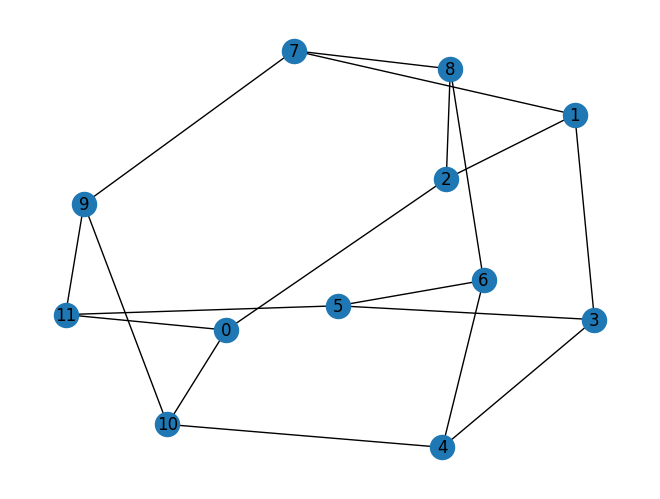

In [57]:
# rysowanie grafu
g = nx.Graph()

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, with_labels=True)
plt.show()

In [58]:
num_genes = 12
mutation_percent_genes = 9

In [59]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_12' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.10148215293884277


In [60]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
Fitness value of the best solution = 12


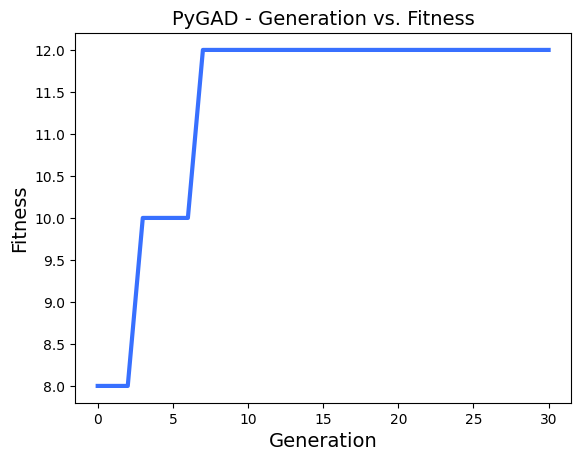

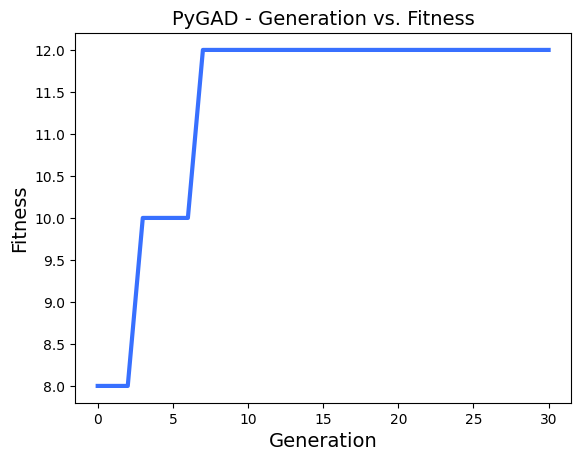

In [61]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

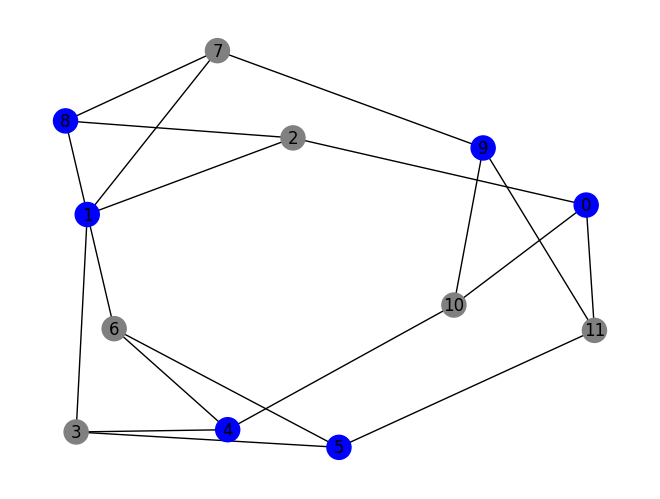

In [62]:
g = nx.Graph()

for i in range(12):
    g.add_node(i)

for i in range(len(graf7)):
    for j in range(len(graf7)):
        if graf7[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(12):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

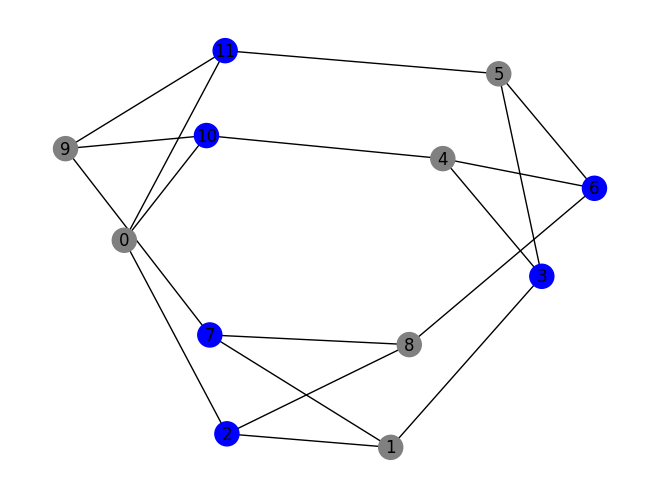

In [63]:
rozwiazanie7 = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,]
# to nie jest jedyne dobre rozwiązanie

g = nx.Graph()

for i in range(12):
    g.add_node(i)

for i in range(len(graf7)):
    for j in range(len(graf7)):
        if graf7[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(12):
    if rozwiazanie7[i] == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

In [64]:
#krawedzie = [[random.randint(0, 11) for _ in range(3)] for _ in range(12)]
#graf = [[0 for _ in range(12)] for _ in range(12)]
#for i in range(12):
#    for j in range(3):
#        if i != krawedzie[i][j]: # nie łączymy wierzchołka i z i, jeśli nie ma 3 wychodzących krawędzi to dopisujemy 1 w dowolnym miejscu
#            graf[i][krawedzie[i][j]] = 1
#graf

### 8. 12 wierzchołków, skierowany (co najwyżej 3 krawędzie wychodzą z jednego wierzchołka)

In [65]:
# garf wygenerowany z kodu powyżej
graf8 = [
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
]
graf = graf8

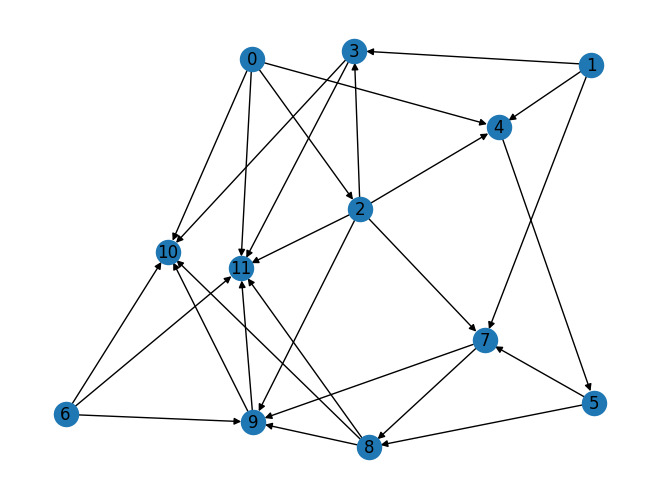

In [66]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [67]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_8' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.10487174987792969


In [68]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
Fitness value of the best solution = 8


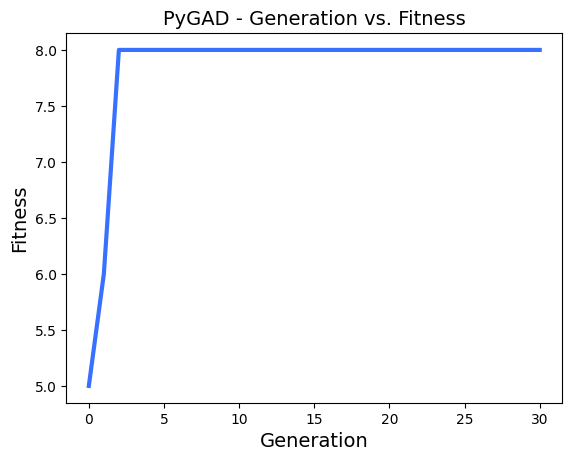

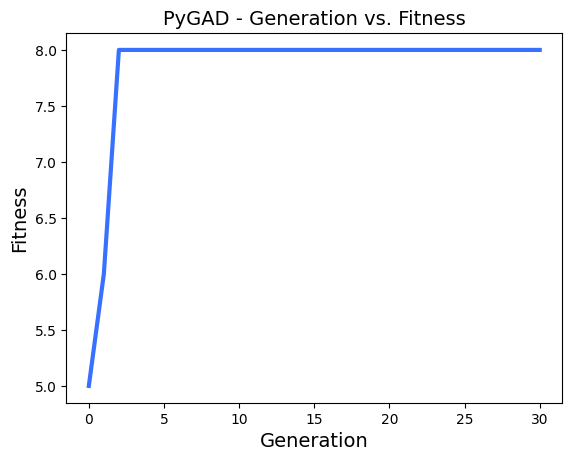

In [69]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

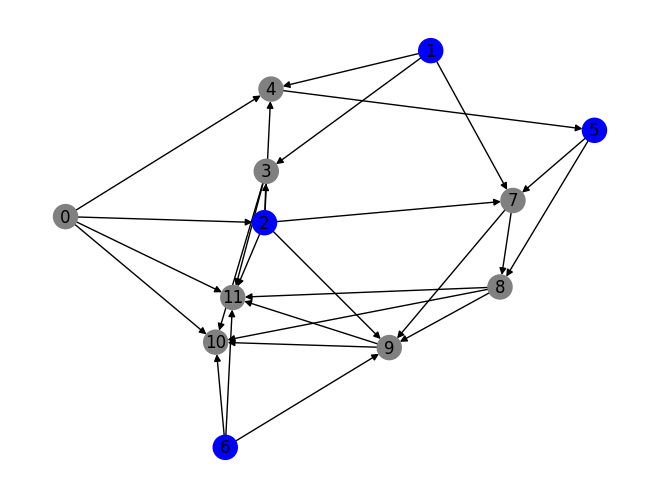

In [70]:
g = nx.Graph()

for i in range(12):
    g.add_node(i)

for i in range(len(graf8)):
    for j in range(len(graf8)):
        if graf8[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
} 

color_map = []
for i in range(12):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

In [71]:
#rnd_num = [[random.randint(0, 1) for _ in range(12)] for _ in range(12)]
#rnd_num

### 9. 12 wierzchołków, skierowany (losowa liczba połączeń)

In [72]:
# graf wygenerowany z powyższego kodu
graf9 = [
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
    [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
]
graf = graf9

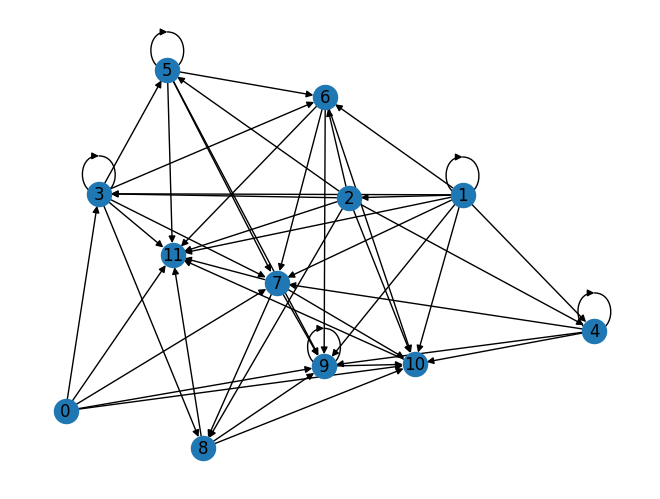

In [73]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [74]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    #stop_criteria='reach_8' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.10742950439453125


In [75]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
Fitness value of the best solution = 8


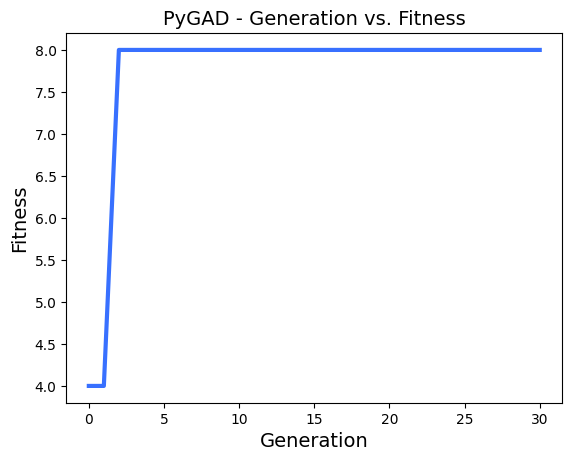

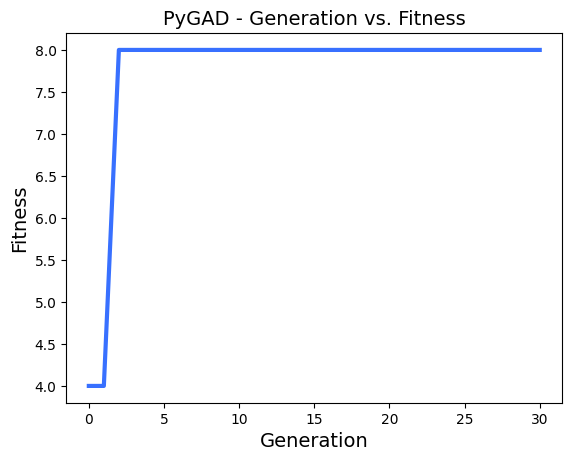

In [76]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

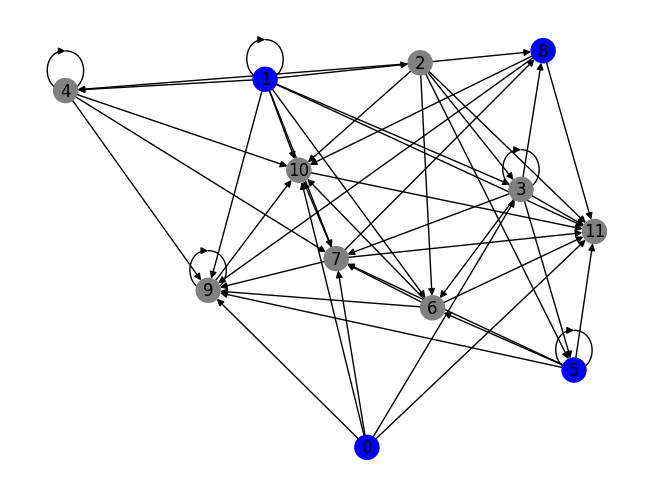

In [77]:
g = nx.Graph()

for i in range(12):
    g.add_node(i)

for i in range(len(graf9)):
    for j in range(len(graf9)):
        if graf9[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
} 

color_map = []
for i in range(12):
    if int(solution[i]) == 1:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

## Sprawdzenie efektywności

In [78]:
wyniki3 = 0
l3 = []
for i in range(100):
    graf7 = [
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], #0
        [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], #1
        [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #2
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], #3
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], #4
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], #5
        [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], #6
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], #7
        [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], #8
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], #9
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], #10
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]  #11
    ]
    
    graf8 = [
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
    ]
    
    graf9 = [
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
        [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
    ]
    
    grafy = [graf7, graf8, graf9]
    graf = random.choice(grafy)
    
    start = time.time()
    
    # inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        #stop_criteria='reach_12' # możemy ustawić reach, jeśli wiemy ile wierzchołków ma maksymalny zbiór niezależny
    )

    # uruchomienie algorytmu
    ga_instance.run()

    end = time.time()
    czas = end - start
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if graf == graf7:
        if solution_fitness == 12:
            wyniki3 += 1
            l3.append(czas)
    if graf == graf8:
        if solution_fitness == 8:
            wyniki3 += 1
            l3.append(czas)
    if graf == graf9:
        if solution_fitness == 8:
            wyniki3 += 1
            l3.append(czas)

In [79]:
print('Efektywność: ', wyniki3/100)
print('Średni czas dla idealnego rozwiązania :', np.mean(l3))
# dla małych inputów algorytm ma stu procentową efektywność

Efektywność:  1.0
Średni czas dla idealnego rozwiązania : 0.09843970775604248


In [80]:
d = {'Efektywność': [wyniki1/100, wyniki2/100, wyniki3/100], 'Czas': [np.mean(l1), np.mean(l2), np.mean(l3)]}
df = pd.DataFrame(data=d, index=['24', '18', '12'])
df

Efektywność      Czas
24         0.62  0.116076
18         0.94  0.105971
12         1.00  0.098440

## Sposób drugi:

In [81]:
# wiemy ile wierzchołków ma zbiór maksymalny (pod tym względem sposób pierwszy wydaje się być lepszy)
# długość chromosomu odpowiada liczbie wierzchołków w szukanym zbiorze
# geny to numery wierzchołków w grafie
# funkcja fitness ocenia zbiór wybranych wierzchołków

### 1. 24 wierzchołki, nieskierowany (po 3 krawędzie z każdego wierzchołka)

In [82]:
# łatwy pierwszy przykład, przedstawiony na grafice na stronie wikipedii (link w bibliografii)
# graf nieskierowany
# graf[i][j] połączenie między wierzchołkami i j
# 1 - jest połączenie z wierzchołkiem graf[i][j], 0 - nie ma połączenia z wierzchołkiem graf[i][j]
graf1 = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #0
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #1
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #2
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], #3
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #4
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #5
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #6
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #7
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #8
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #9
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #10
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #11
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], #12
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #13
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], #14
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], #15
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #16
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #17
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], #18
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], #19
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #20
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #21
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], #22
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]  #23
]
# rozwiazanie = [1, 3, 6, 9, 11, 12, 14, 17, 19]
graf = graf1

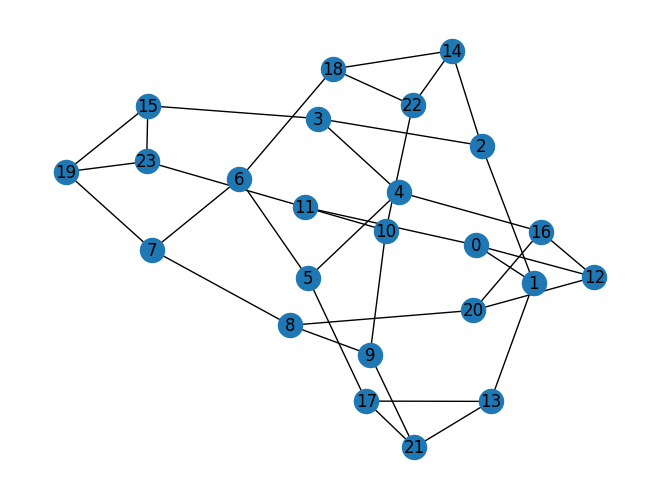

In [83]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, with_labels=True)
plt.show()

In [84]:
# definiujemy parametry rozwiązania
# geny to numery wierzchołków
gene_space = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

def fitness_func(solution, solution_idx):
    fitness = 0
    # chromosom ma określoną ilość genów, (wierzchołki) nie mogą się powtarzać
    # sprawdzamy czy są połączenia między wierzchołkami, jeśli nie ma to git
    for i in solution:
        for j in solution:
            if i != j:
                if graf[int(i)][int(j)] == 1:
                    fitness -= 1
    return fitness

fitness_function = fitness_func

In [85]:
# ile chromosomów w populacji
sol_per_pop = 100
# ile genów ma chromosom
num_genes = 9

# ile wylaniamy rodziców do "rozmnażania" (okolo 50% populacji)
num_parents_mating = 50
# ile pokoleń
num_generations = 30
# ilu rodziców zachować (kilka procent)
keep_parents = 2

# jaki typ selekcji rodzicow?
parent_selection_type = "rank"

# w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genów?
mutation_type = "random"
mutation_percent_genes = 20

In [86]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.2754635810852051


In [87]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 23
Parameters of the best solution : [17. 11.  6.  2.  4. 19.  9. 20. 22.]
Fitness value of the best solution = 0


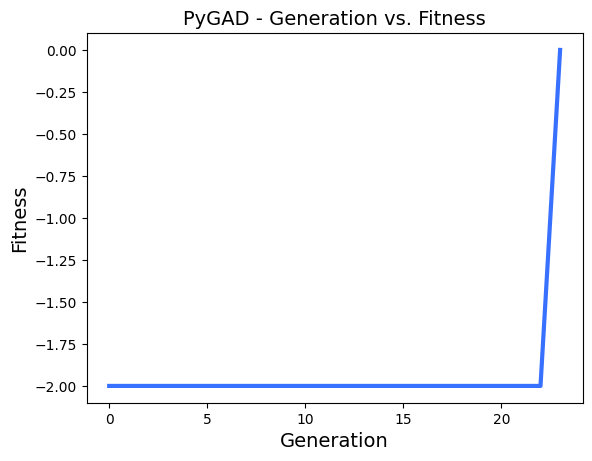

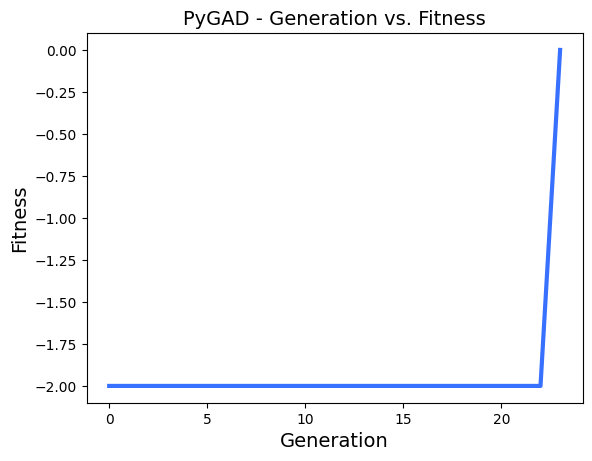

In [88]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

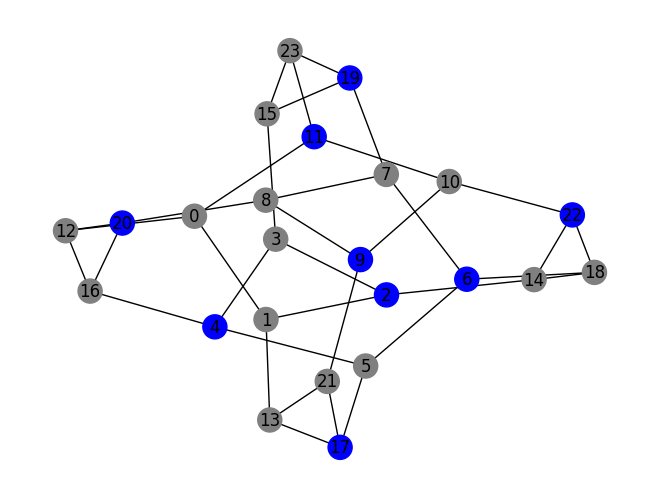

In [89]:
g = nx.Graph(directed=True)

for i in range(24):
    g.add_node(i)

for i in range(len(graf1)):
    for j in range(len(graf1)):
        if graf1[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(24):
    if float(i) in solution:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

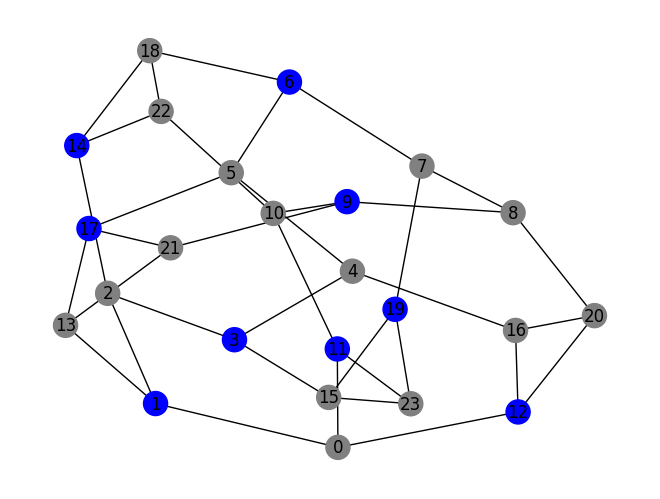

In [90]:
rozwiazanie2 = [1, 3, 6, 9, 11, 12, 14, 17, 19] # to nie jest jedyne dobre rozwiązanie

g = nx.Graph(directed=True)

for i in range(24):
    g.add_node(i)

for i in range(len(graf1)):
    for j in range(len(graf1)):
        if graf1[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(24):
    if i in rozwiazanie2:
        color_map.append('blue')
    else:
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

### 2. 24 wierzchołki, skierowany (po 3 krawędzie z każdego wierzchołka)

In [91]:
graf2 = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #0
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #1
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], #2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], #3
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #4
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], #5
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], #7
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], #8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #10
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #11
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #12
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #13
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #14
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #15
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], #16
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #17
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #18
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #19
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #20
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], #21
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #22
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  #23
]
graf = graf2

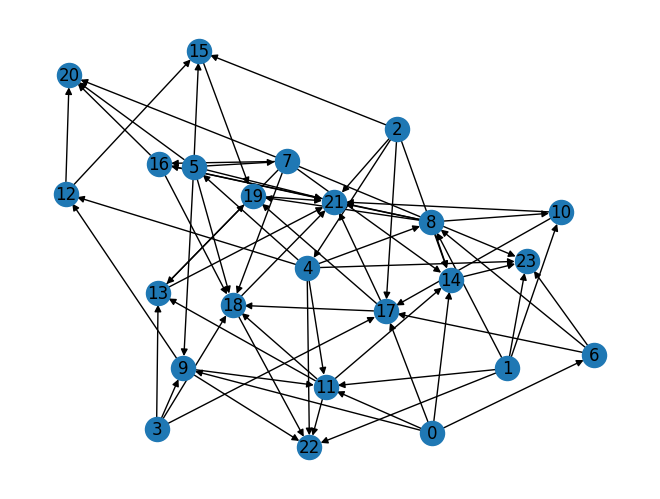

In [92]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [93]:
# z pierwszego algorytmu wynika, że największy zbiór ma moc 10
num_genes = 10
mutation_percent_genes = 10

In [94]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.3734707832336426


In [95]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [14. 13.  9.  4. 19. 10.  1. 18. 20.  6.]
Fitness value of the best solution = -2


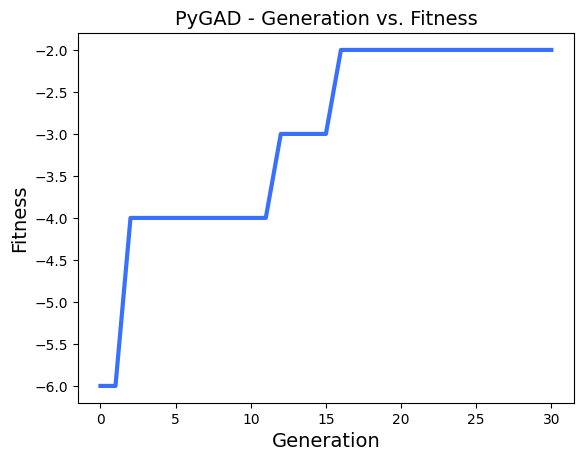

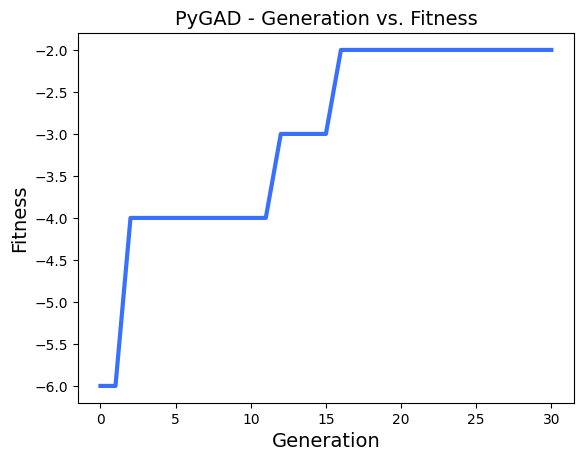

In [96]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

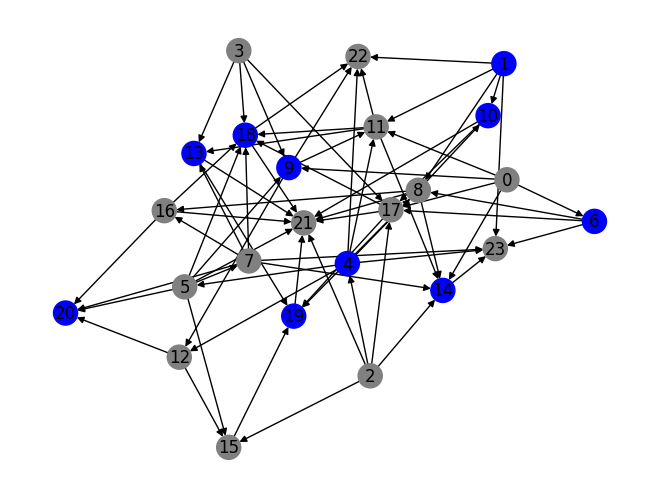

In [97]:
g = nx.Graph(directed=True)

for i in range(24):
    g.add_node(i)

for i in range(len(graf2)):
    for j in range(len(graf2)):
        if graf2[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

color_map = []
for i in range(24):
    if float(i) in solution:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

### 3. 24 wierzchołki, skierowany (losowa liczba połączeń)

In [98]:
graf3 = [
    [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], #0
    [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], #1
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], #2
    [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], #3
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], #4
    [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], #5
    [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], #6
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], #7
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], #8
    [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], #9
    [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], #10
    [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], #11
    [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], #12
    [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], #13
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], #14
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], #15
    [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], #16
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], #17
    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], #18
    [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], #19
    [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], #20
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], #21
    [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0], #22
    [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]  #23
]
graf = graf3

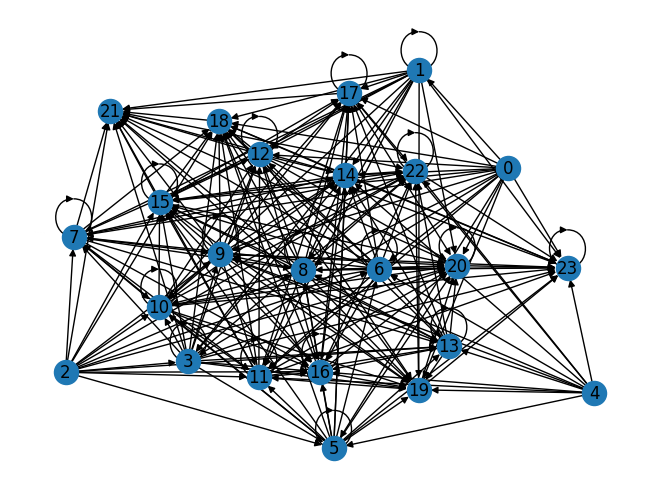

In [99]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [100]:
# z pierwszego algorytmu wynika, że największy zbiór ma moc 4
num_genes = 4
mutation_percent_genes = 25

In [101]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.23160529136657715


In [102]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [21. 16. 13. 23.]
Fitness value of the best solution = -1


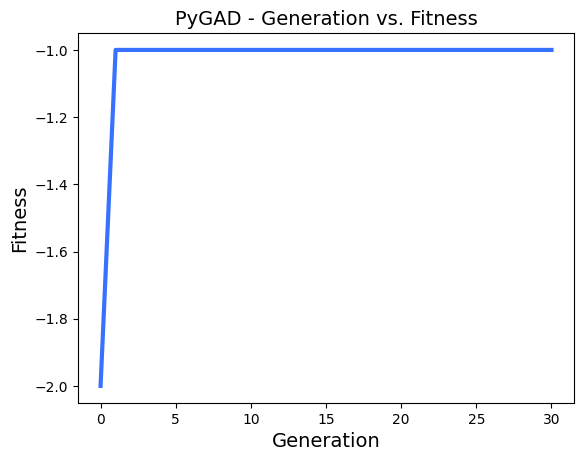

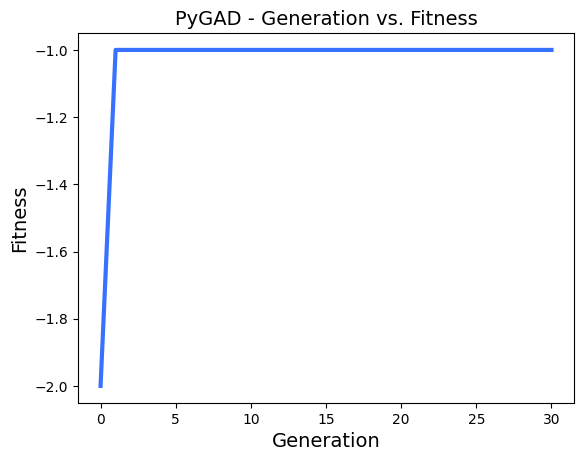

In [103]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

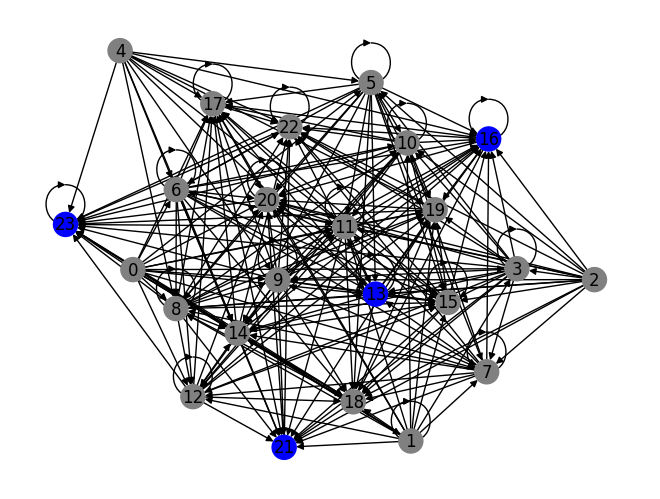

In [104]:
g = nx.Graph(directed=True)

for i in range(24):
    g.add_node(i)

for i in range(len(graf3)):
    for j in range(len(graf3)):
        if graf3[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

color_map = []
for i in range(24):
    if float(i) in solution:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

## Sprawdzenie efektywności

In [105]:
wyniki4 = 0
l4 = []
for i in range(100):
    graf1 = [
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #0
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #1
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #2
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], #3
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #4
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #5
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #6
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #7
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #8
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #9
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #10
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #11
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], #12
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #13
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], #14
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], #15
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #16
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #17
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], #18
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], #19
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #20
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #21
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], #22
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]  #23
    ]
    
    graf2 = [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #0
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #1
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], #2
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], #3
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #4
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], #5
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #6
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], #7
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], #8
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #9
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #10
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #11
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #12
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #13
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], #14
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #15
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], #16
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #17
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #18
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #19
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #20
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], #21
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #22
        [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  #23
    ]
    
    graf3 = [
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1], #0
        [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1], #1
        [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0], #2
        [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], #3
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], #4
        [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], #5
        [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], #6
        [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], #7
        [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], #8
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], #9
        [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], #10
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], #11
        [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], #12
        [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], #13
        [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], #14
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], #15
        [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], #16
        [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], #17
        [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], #18
        [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], #19
        [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], #20
        [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], #21
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0], #22
        [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]  #23
    ]
    
    grafy = [graf1, graf2, graf3]
    graf = random.choice(grafy)
    
    # w zależności od wylosowanego grafu musimy ustawić inną liczbę genów w chromosomie
    if graf == graf1:
        num_genes = 9
        mutation_percent_genes = 20
    if graf == graf2:
        num_genes = 10
        mutation_percent_genes = 10
    if graf == graf3:
        num_genes = 4
        mutation_percent_genes = 25
    
    start = time.time()
    
    # inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        stop_criteria='reach_0'
    )

    # uruchomienie algorytmu
    ga_instance.run()

    end = time.time()
    czas = end - start
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        wyniki4 += 1
        l4.append(czas)

In [106]:
print('Efektywność: ', wyniki4/100)
print('Średni czas dla idealnego rozwiązania :', np.mean(l4))
# algorytm drugi również działa całkiem dobrze dla dużych inputów, czas jest krótki

Efektywność:  0.55
Średni czas dla idealnego rozwiązania : 0.12484852183948864


### 4. 18 wierzchołków, nieskierowany

In [107]:
# ponieważ zmieniamy liczbę wierzchołków w grafie, należy ponowinie zdefiniować gene_space
gene_space = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

graf4 = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #0
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #1
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #2
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #3
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #4
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #5
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #6
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], #8
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], #9
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], #10
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], #11
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], #12
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], #13
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], #14
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], #15
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], #16
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]  #17
]
# rozwiazanie = [0, 3, 4, 7, 9, 11, 14, 17]
graf = graf4

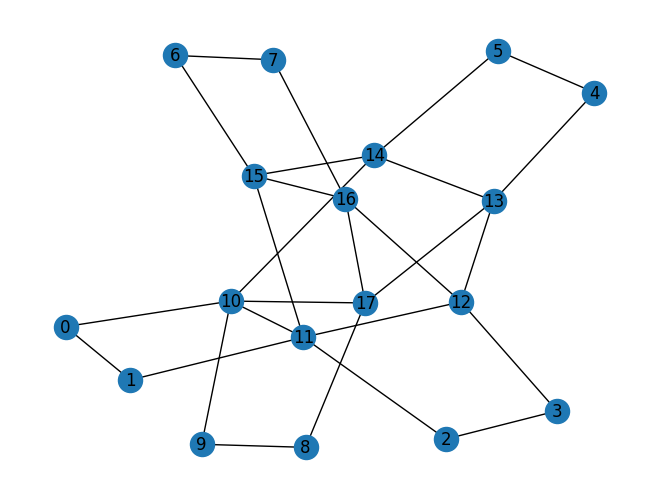

In [108]:
# rysowanie grafu
g = nx.Graph()

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, with_labels=True)
plt.show()

In [109]:
# z pierwszego algorytmu wynika, że największy zbiór ma moc 8
num_genes = 8
mutation_percent_genes = 20

In [110]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.24867987632751465


In [111]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 15
Parameters of the best solution : [ 1.  4.  2. 12.  6.  9. 17. 14.]
Fitness value of the best solution = 0


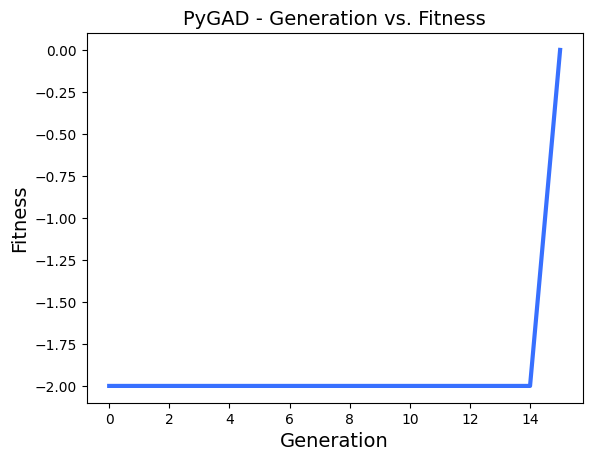

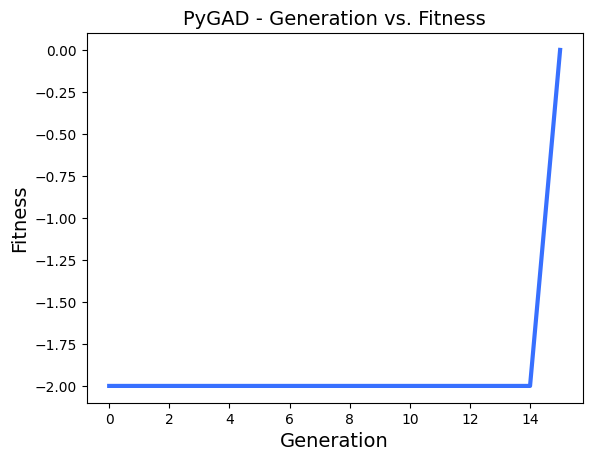

In [112]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

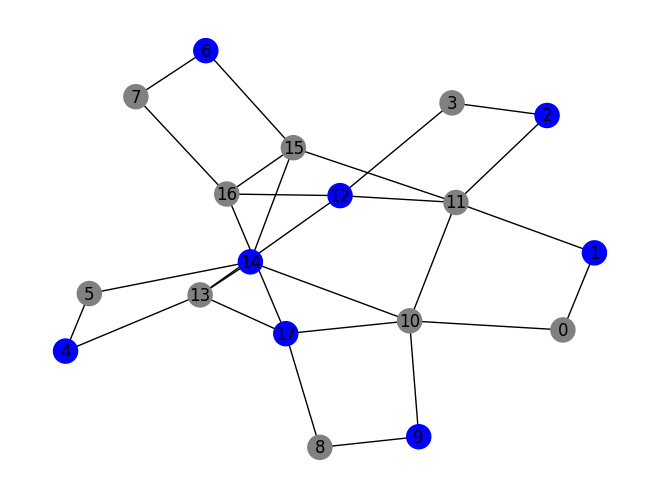

In [113]:
g = nx.Graph(directed=True)

for i in range(18):
    g.add_node(i)

for i in range(len(graf4)):
    for j in range(len(graf4)):
        if graf4[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(18):
    if float(i) in solution:
        color_map.append('blue')
    else:
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

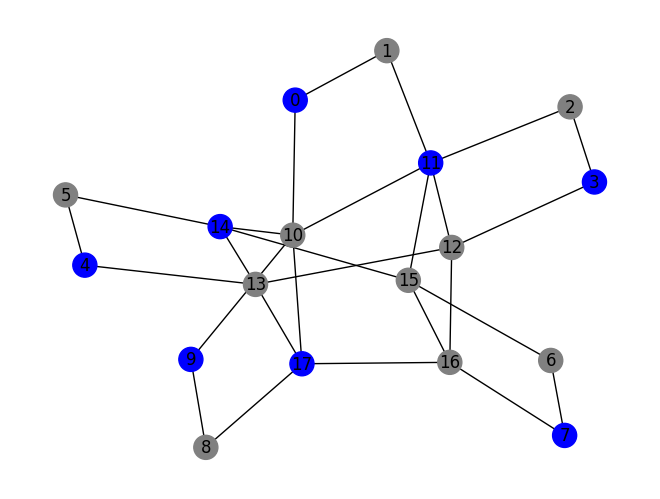

In [114]:
rozwiazanie5 = [0, 3, 4, 7, 9, 11, 14, 17] # to nie jest jedyne dobre rozwiązanie

g = nx.Graph(directed=True)

for i in range(18):
    g.add_node(i)

for i in range(len(graf4)):
    for j in range(len(graf4)):
        if graf4[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(18):
    if i in rozwiazanie5:
        color_map.append('blue')
    else:
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

### 5. 18 wierzchołków, skierowany (maksymalnie 4 krawędzie z każdego wierzchołka)

In [115]:
graf5 = [
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
]
graf = graf5

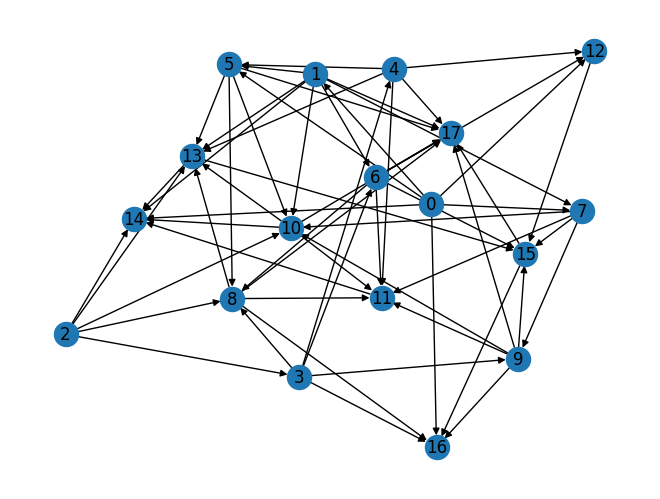

In [116]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [117]:
# z pierwszego algorytmu wynika, że największy zbiór ma moc 10
num_genes = 5
mutation_percent_genes = 20

In [118]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.037238359451293945


In [119]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 2
Parameters of the best solution : [16.  2.  4.  7.  6.]
Fitness value of the best solution = 0


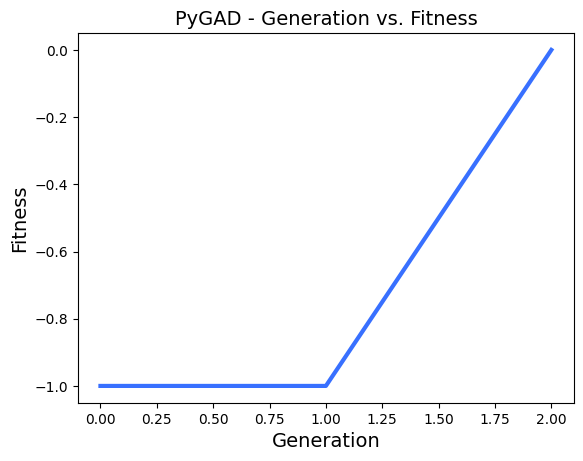

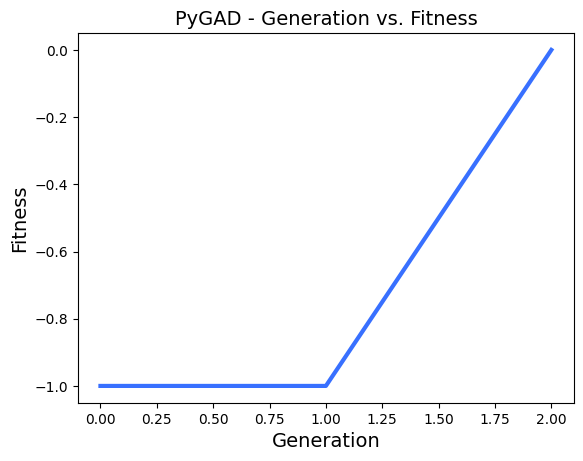

In [120]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

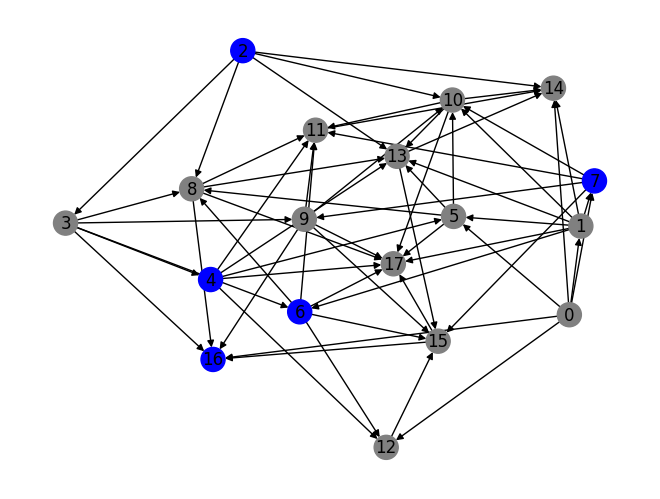

In [121]:
g = nx.Graph(directed=True)

for i in range(18):
    g.add_node(i)

for i in range(len(graf5)):
    for j in range(len(graf5)):
        if graf5[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

color_map = []
for i in range(18):
    if float(i) in solution:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

### 6. 18 wierzchołków, skierowany (losowa liczba połączeń)

In [122]:
graf6 = [
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
]
graf = graf6

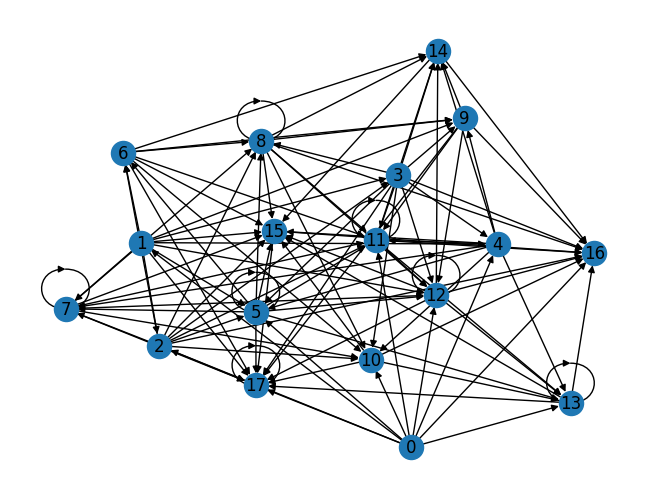

In [123]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [124]:
# z pierwszego algorytmu wynika, że największy zbiór ma moc 4
num_genes = 4
mutation_percent_genes = 25

In [125]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.05365467071533203


In [126]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 4
Parameters of the best solution : [0. 7. 6. 3.]
Fitness value of the best solution = 0


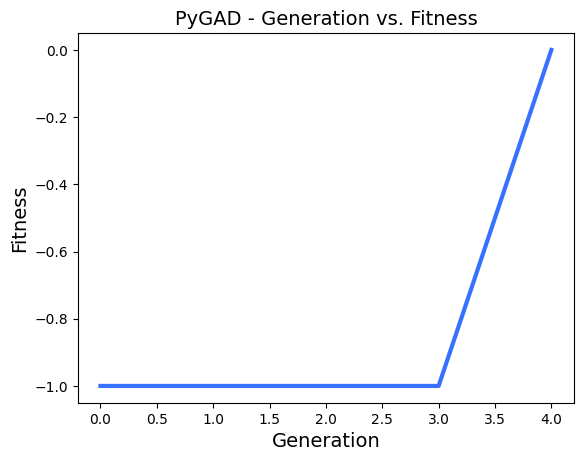

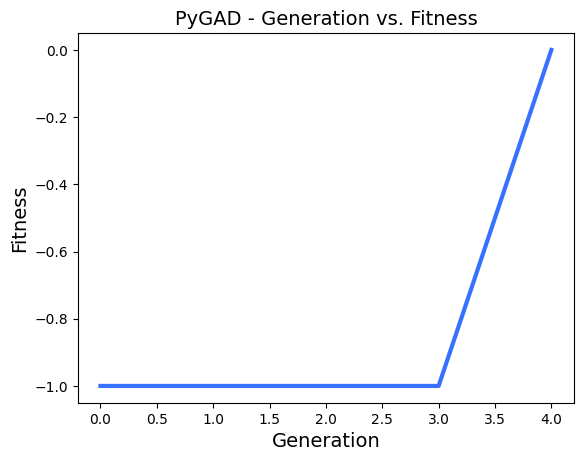

In [127]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

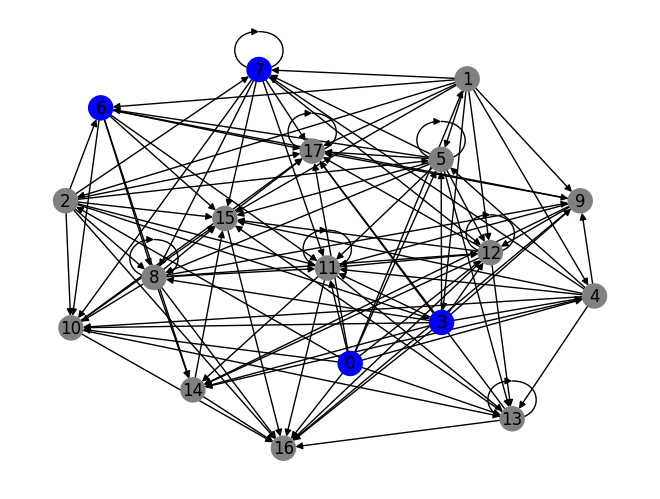

In [128]:
g = nx.Graph(directed=True)

for i in range(18):
    g.add_node(i)

for i in range(len(graf6)):
    for j in range(len(graf6)):
        if graf6[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

color_map = []
for i in range(18):
    if float(i) in solution:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

## Sprawdzenie efektywności

In [129]:
wyniki5 = 0
l5 = []
for i in range(100):
    graf4 = [
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], #0
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #1
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #2
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #3
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #4
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #5
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], #6
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], #7
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], #8
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], #9
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], #10
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], #11
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], #12
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], #13
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], #14
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], #15
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], #16
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]  #17
    ]
    
    graf5 = [
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
    
    graf6 = [
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
        [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
        [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
        [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
        [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]
    ]
    
    grafy = [graf4, graf5, graf6]
    graf = random.choice(grafy)
    
    # w zależności od wylosowanego grafu musimy ustawić inną liczbę genów w chromosomie
    if graf == graf4:
        num_genes = 8
        mutation_percent_genes = 20
    if graf == graf5:
        num_genes = 5
        mutation_percent_genes = 20
    if graf == graf6:
        num_genes = 4
        mutation_percent_genes = 25
    
    start = time.time()
    
    # inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        stop_criteria='reach_0'
    )
    
    # uruchomienie algorytmu
    ga_instance.run()

    end = time.time()
    czas = end - start
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        wyniki5 += 1
        l5.append(czas)

In [130]:
print('Efektywność: ', wyniki5/100)
print('Średni czas dla idealnego rozwiązania :', np.mean(l5))
# wyniki efektywności dla średnich inputów są porównywalne w obu algorytmach
# natomiast czas jest znacznie krótszy

Efektywność:  0.99
Średni czas dla idealnego rozwiązania : 0.06723508449515911


### 7. 12 wierzchołków, nieskierowany (po 3 krawędzie z każdego wierzchołka)

In [131]:
# ponieważ zmieniamy liczbę wierzchołków w grafie, należy ponowinie zdefiniować gene_space
gene_space = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

graf7 = [
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], #0
    [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], #1
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #2
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], #3
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], #4
    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], #5
    [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], #6
    [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], #7
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], #8
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], #9
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], #10
    [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]  #11
]
# rozwiazanie = [2, 3, 6, 7, 10, 11]
graf = graf7

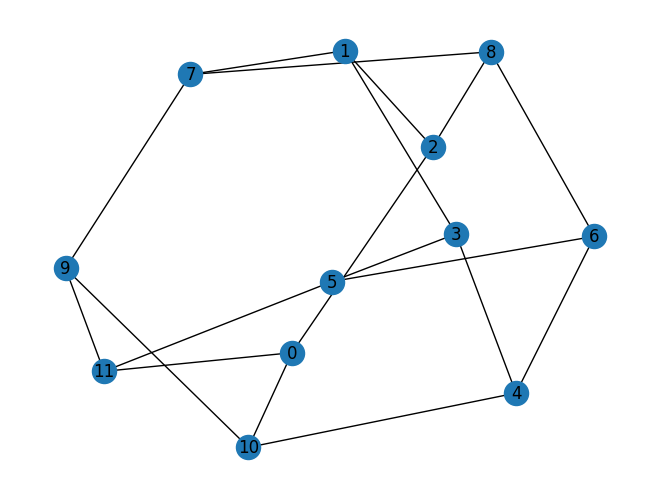

In [132]:
# rysowanie grafu
g = nx.Graph()

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, with_labels=True)
plt.show()

In [133]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.37476277351379395


In [134]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 30
Parameters of the best solution : [2. 7. 1. 9. 5. 8. 4. 0.]
Fitness value of the best solution = -12


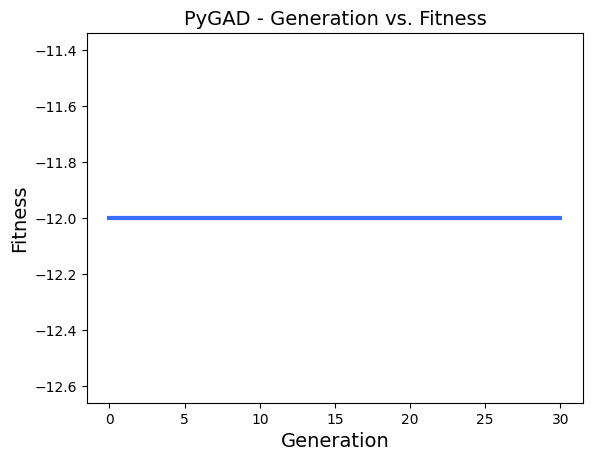

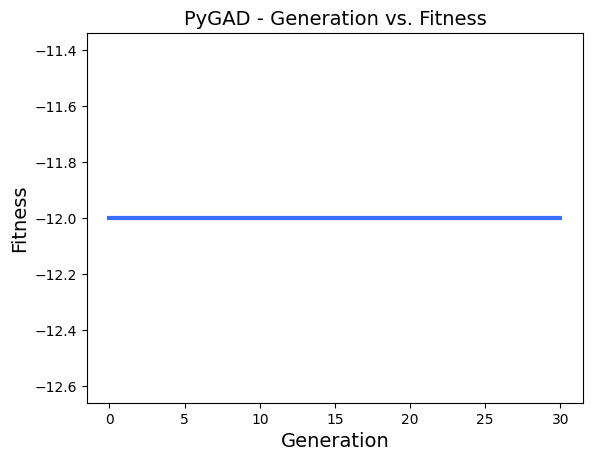

In [135]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

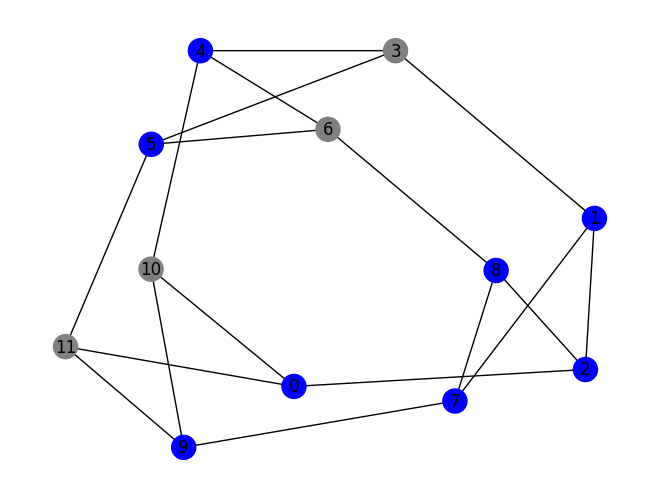

In [136]:
g = nx.Graph(directed=True)

for i in range(12):
    g.add_node(i)

for i in range(len(graf7)):
    for j in range(len(graf7)):
        if graf7[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(12):
    if float(i) in solution:
        color_map.append('blue')
    else:
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

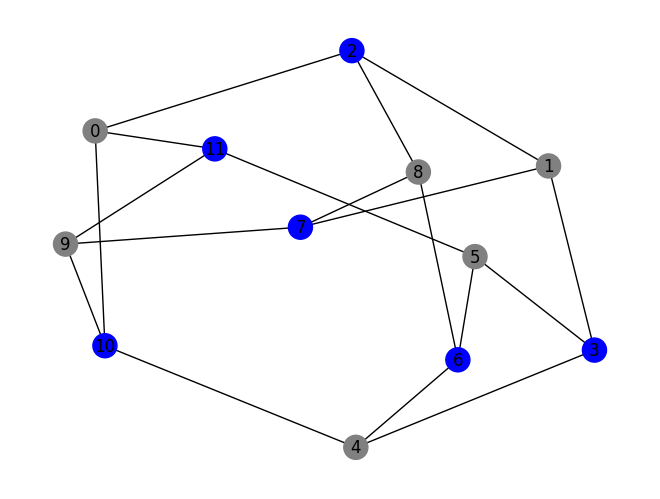

In [137]:
rozwiazanie8 = [2, 3, 6, 7, 10, 11] # to nie jest jedyne dobre rozwiązanie

g = nx.Graph(directed=True)

for i in range(12):
    g.add_node(i)

for i in range(len(graf7)):
    for j in range(len(graf7)):
        if graf7[i][j] == 1:
            g.add_edge(i, j)

color_map = []
for i in range(12):
    if i in rozwiazanie8:
        color_map.append('blue')
    else:
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, node_color=color_map, with_labels=True)
plt.show()

### 8. 12 wierzchołków, skierowany (co najwyżej 3 krawędzie wychodzą z jednego wierzchołka)

In [138]:
graf8 = [
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
]
graf = graf8

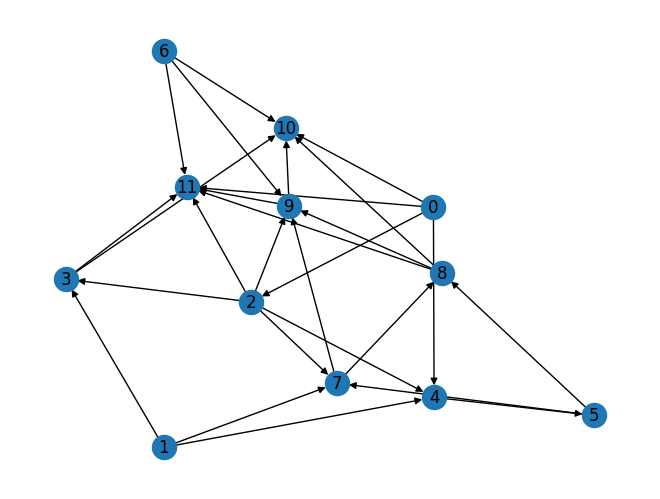

In [139]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [140]:
# z pierwszego algorytmu wynika, że największy zbiór ma moc 4
num_genes = 4
mutation_percent_genes = 25

In [141]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.0144195556640625


In [142]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 1
Parameters of the best solution : [7. 3. 0. 6.]
Fitness value of the best solution = 0


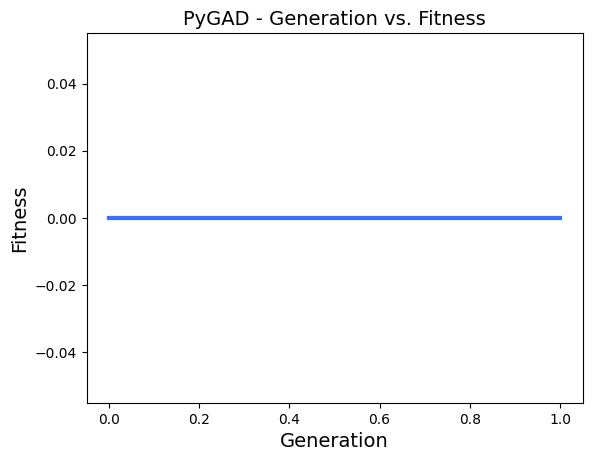

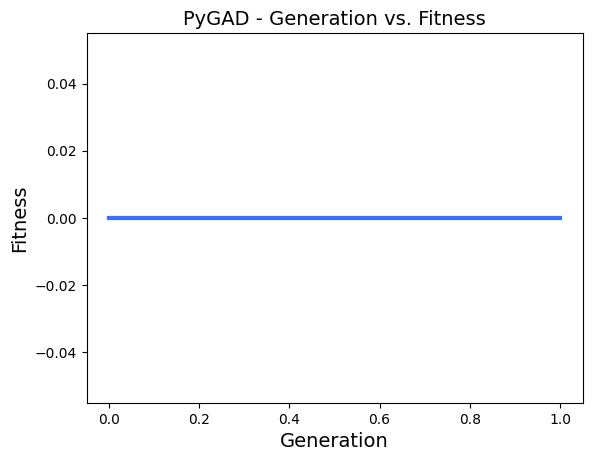

In [143]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

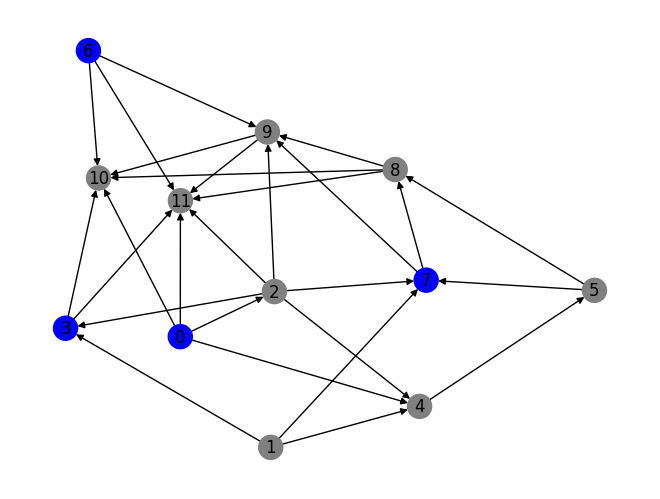

In [144]:
g = nx.Graph(directed=True)

for i in range(12):
    g.add_node(i)

for i in range(len(graf8)):
    for j in range(len(graf8)):
        if graf8[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

color_map = []
for i in range(12):
    if float(i) in solution:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

### 9. 12 wierzchołków, skierowany (losowa liczba połączeń)

In [145]:
graf9 = [
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
    [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
]
graf = graf9

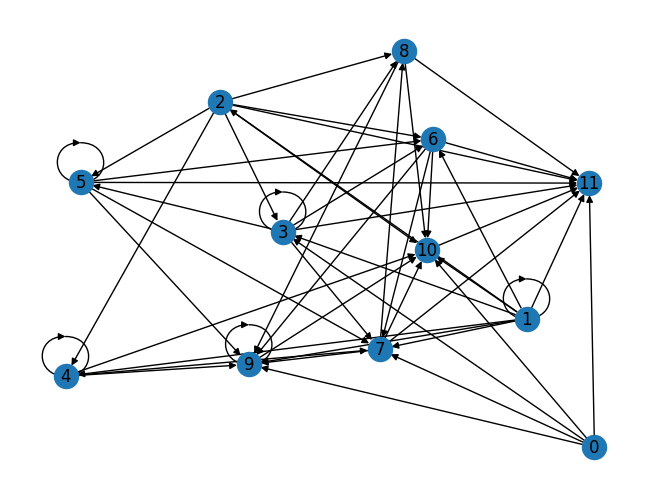

In [146]:
# rysowanie grafu
g = nx.Graph(directed=True)

for i in range(len(graf)):
    g.add_node(i)

for i in range(len(graf)):
    for j in range(len(graf)):
        if graf[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, with_labels=True)
plt.show()

In [147]:
# z pierwszego algorytmu wynika, że największy zbiór ma moc 4
num_genes = 4
mutation_percent_genes = 25

In [148]:
start = time.time()

# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes,
    stop_criteria='reach_0'
)

# uruchomienie algorytmu
ga_instance.run()

end = time.time()
czas = end - start
print("Czas: ", czas)

solution, solution_fitness, solution_idx = ga_instance.best_solution()

Czas:  0.01598358154296875


In [149]:
#ile pokoleń
print("Number of generations passed is : {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#podsumowanie: najlepsze znalezione rozwiazanie (ścieżka + ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Number of generations passed is : 1
Parameters of the best solution : [8. 5. 0. 4.]
Fitness value of the best solution = 0


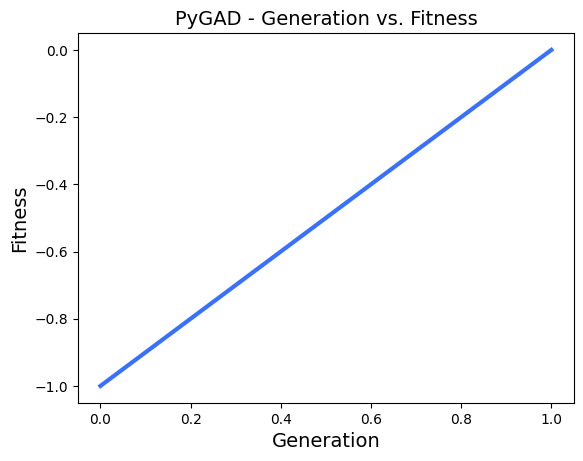

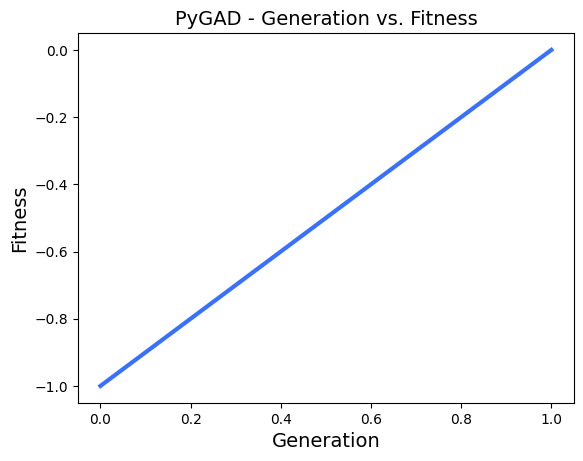

In [150]:
# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokoleń
ga_instance.plot_fitness()

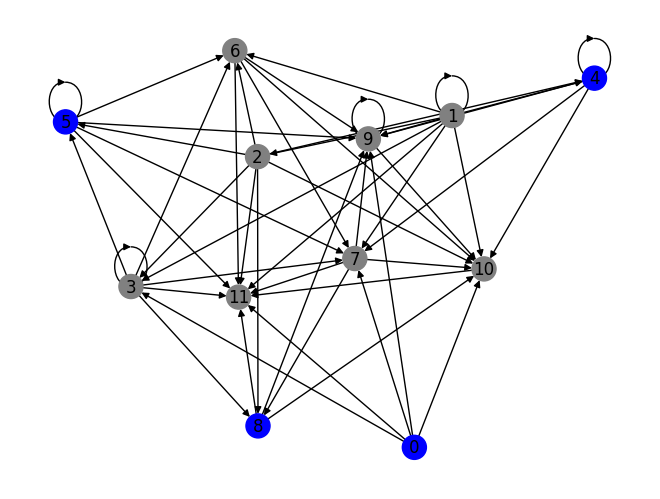

In [151]:
g = nx.Graph(directed=True)

for i in range(12):
    g.add_node(i)

for i in range(len(graf9)):
    for j in range(len(graf9)):
        if graf9[i][j] == 1:
            g.add_edge(i, j)

options = {
    #'node_color': 'blue',
    #'node_size': 100,
    #'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 10,
}

color_map = []
for i in range(12):
    if float(i) in solution:
        color_map.append('blue')
    else: 
        color_map.append('gray')

# draw, draw_networkx, draw_circular, draw_planar, draw_random, draw_spectral, draw_spring, draw_shell
nx.draw_spring(g, arrows=True, **options, node_color=color_map, with_labels=True)
plt.show()

## Sprawdzenie efektywności

In [152]:
wyniki6 = 0
l6 = []
for i in range(100):
    graf7 = [
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], #0
        [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], #1
        [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #2
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], #3
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], #4
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], #5
        [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], #6
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], #7
        [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], #8
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], #9
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], #10
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]  #11
    ]
    
    graf8 = [
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
    ]
    
    graf9 = [
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
        [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
    ]
    
    grafy = [graf7, graf8, graf9]
    graf = random.choice(grafy)
    
    # w zależności od wylosowanego grafu musimy ustawić inną liczbę genów w chromosomie
    if graf == graf7:
        num_genes = 6
        mutation_percent_genes = 20
    if graf == graf8:
        num_genes = 4
        mutation_percent_genes = 25
    if graf == graf9:
        num_genes = 4
        mutation_percent_genes = 25
    
    start = time.time()
    
    # inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        allow_duplicate_genes=False, # wierzchołki nie mogą się powtarzać
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        stop_criteria='reach_0'
    )

    # uruchomienie algorytmu
    ga_instance.run()

    end = time.time()
    czas = end - start
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        wyniki6 += 1
        l6.append(czas)

In [153]:
print('Efektywność: ', wyniki6/100)
print('Średni czas dla idealnego rozwiązania :', np.mean(l6))
# rówież mamy stu procentową efektywność dla małlych inputów

Efektywność:  1.0
Średni czas dla idealnego rozwiązania : 0.020407841205596924


In [154]:
d2 = {'Efektywność': [wyniki4/100, wyniki5/100, wyniki6/100], 'Czas': [np.mean(l4), np.mean(l5), np.mean(l6)]}
df2 = pd.DataFrame(data=d2, index=['24', '18', '12'])
df, df2

(    Efektywność      Czas
 24         0.62  0.116076
 18         0.94  0.105971
 12         1.00  0.098440,
     Efektywność      Czas
 24         0.55  0.124849
 18         0.99  0.067235
 12         1.00  0.020408)

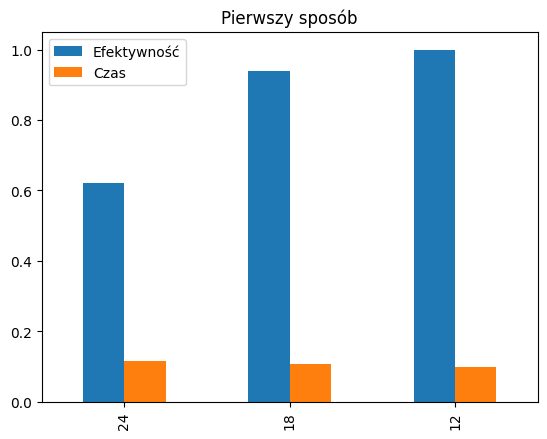

In [155]:
df.plot.bar()
plt.title('Pierwszy sposób')
plt.show()

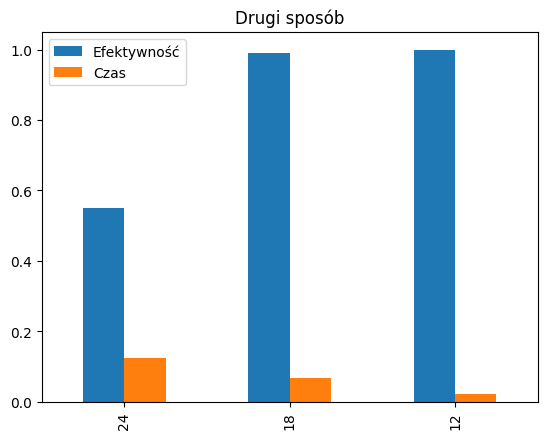

In [156]:
df2.plot.bar()
plt.title('Drugi sposób')
plt.show()

In [157]:
# Wnioski:
# oba algorytmy działają, jednak dla inputów powyżej 20 wierzchołków efektywność bardzo zmalała
# algorytmy rozwiązują problem w bardzo krótkim czasie
# pierwszy algorytm jest lepszy w odpowiadaniu na pytanie: jaki jest największy zbiór niezależnych wierzchołków
# drugi algorytm odpowiada na pytanie: czy istnieje zbiór niezależny o podanej mocy (jeśli wyniki są ujemne
# to nie istnieje, gdy otrzymamy wynik fitness = 0 to istnieje i możemy spróbować poszukać większego zbioru)

## Bibliografia

Informacje i przykład pierwszy:

https://pl.wikipedia.org/wiki/Zbi%C3%B3r_niezale%C5%BCny

https://en.wikipedia.org/wiki/Independent_set_(graph_theory)

Rysowanie grafów:

https://www.geeksforgeeks.org/python-visualize-graphs-generated-in-networkx-using-matplotlib/